In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
import src.util as util
import yaml
import copy
from tqdm import tqdm
import os
from datetime import datetime

In [49]:
config_data=util.config_load()

In [50]:
def read_raw_data(config: dict,filetype) -> pd.DataFrame:
    # Create variable to store raw dataset
    raw_dataset = pd.DataFrame()

    # Raw Dataset Dir
    raw_dataset_dir = config["raw_dataset_dir"]

     # List files in the directory and filter those with filetype in the filename
    files = [f for f in os.listdir(raw_dataset_dir) if filetype in f and f.endswith('.csv')]

    # Process and concatenate each filtered file
    for i in tqdm(files):
        file_path = os.path.join(raw_dataset_dir, i)
        raw_dataset = pd.concat([raw_dataset, pd.read_csv(file_path)], ignore_index=True)


    # Return the concatenated DataFrame
    return raw_dataset

In [48]:
df_ben=read_raw_data(config_data,'Beneficiary')
df_inp=read_raw_data(config_data,'Inpatient')
df_outp=read_raw_data(config_data,'Outpatient')

100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


In [6]:
print(len(df_ben))
print(len(df_inp))
print(len(df_outp))

63968
9551
125841


In [37]:
util.pickle_dump(df_ben, config_data["raw_dataset_path_ben"])
util.pickle_dump(df_inp, config_data["raw_dataset_path_inp"])
util.pickle_dump(df_outp, config_data["raw_dataset_path_outp"])

**Beneficiary File**

In [8]:
df_ben.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [9]:
df_ben.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BeneID,63968,63968,BENE159112,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,63968,900,1940-03-01,265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOD,574,12,2009-12-01,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,63968.0,NaN,NaN,NaN,1.574053,0.49449,1.0,1.0,2.0,2.0,2.0
Race,63968.0,NaN,NaN,NaN,1.250219,0.710366,1.0,1.0,1.0,1.0,5.0
RenalDiseaseIndicator,63968,2,0,53408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,63968.0,NaN,NaN,NaN,26.298681,14.954124,1.0,12.0,26.0,39.0,54.0
County,63968.0,NaN,NaN,NaN,368.597893,270.243676,0.0,140.0,330.0,560.0,999.0
NoOfMonths_PartACov,63968.0,NaN,NaN,NaN,11.91885,0.967169,0.0,12.0,12.0,12.0,12.0
NoOfMonths_PartBCov,63968.0,NaN,NaN,NaN,11.928152,0.841754,0.0,12.0,12.0,12.0,12.0


In [10]:
df_ben.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [11]:
df_ben_copy=df_ben.copy()

In [12]:
def type_conv(set_data, config_data,datetime_columns,obj_columns,int_columns):
  
    
    # --- Convert columns to datetime format --- #
    for col in config_data[datetime_columns]:
        if set_data[col].dtype != 'datetime64[ns]':
            set_data[col] = pd.to_datetime(set_data[col])

    # --- Convert specified columns to object type --- #
    for col in config_data[obj_columns]:
        if set_data[col].dtype != 'object':
                set_data[col] = set_data[col].astype(str)

    # --- Convert specified float columns to integer format --- #
    for col in config_data[int_columns]:
        set_data[col]=set_data[col].fillna(0)
        if set_data[col].dtype != 'int64':
            set_data[col] = set_data[col].astype(int)

    # --- Return the modified DataFrame --- #
    return set_data

  


In [13]:
df_ben_conv=type_conv(df_ben,config_data,"datetime_columns_ben","obj_columns_ben","int_columns_ben")

In [14]:
df_ben_conv.dtypes

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                     object
Race                                       object
RenalDiseaseIndicator                      object
State                                      object
County                                     object
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                      object
ChronicCond_Heartfailure                   object
ChronicCond_KidneyDisease                  object
ChronicCond_Cancer                         object
ChronicCond_ObstrPulmonary                 object
ChronicCond_Depression                     object
ChronicCond_Diabetes                       object
ChronicCond_IschemicHeart                  object
ChronicCond_Osteoporasis                   object
ChronicCond_rheumatoidarthritis            object


In [15]:
df_ben_conv.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
BeneID,63968,63968,BENE159112,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DOB,63968,NaN,NaN,NaN,1936-04-02 23:37:52.286143104,1909-01-01 00:00:00,1927-10-01 00:00:00,1935-06-01 00:00:00,1941-12-01 00:00:00,1983-12-01 00:00:00,NaN
DOD,574,NaN,NaN,NaN,2009-08-06 22:19:39.094076672,2009-01-01 00:00:00,2009-06-01 00:00:00,2009-08-16 12:00:00,2009-11-01 00:00:00,2009-12-01 00:00:00,NaN
Gender,63968,2,2,36721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,63968,4,1,54105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RenalDiseaseIndicator,63968,2,0,53408,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,63968,52,45,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
County,63968,285,10,1710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoOfMonths_PartACov,63968.0,NaN,NaN,NaN,11.91885,0.0,12.0,12.0,12.0,12.0,0.967169
NoOfMonths_PartBCov,63968.0,NaN,NaN,NaN,11.928152,0.0,12.0,12.0,12.0,12.0,0.841754


In [16]:
def feature_addition_ben(dataset_conv):
    #Age from max value from set
    max_bene_DOD = max(dataset_conv['DOD'].dropna().unique()[1:])
    dataset_conv['DOD_imputed']=dataset_conv['DOD']
    dataset_conv['DOD_imputed']=dataset_conv['DOD_imputed'].apply(lambda i: i if pd.notna(i)  else max_bene_DOD )
    dataset_conv['AGE'] = np.round(((dataset_conv['DOD_imputed'] - dataset_conv['DOB']).dt.days)/365.0,1)
    dataset_conv['AGE']= dataset_conv['AGE'].astype('int64')
    dataset_conv['DOD_Flag']=dataset_conv['DOD'].apply(lambda i: 1 if pd.notna(i)  else 0 )
    dataset_conv['DOD_Flag']= dataset_conv['DOD_Flag'].astype('object')

In [17]:
feature_addition_ben(df_ben_conv)

In [18]:
def col_separation(dataset):
    cat_cols=dataset.select_dtypes('object').columns.to_list()
    int_cols=dataset.select_dtypes('int64').columns.to_list()
    time_cols=dataset.select_dtypes('datetime64[ns]').columns.to_list()
    return cat_cols,int_cols,time_cols

In [19]:
cat_cols=col_separation(df_ben_conv)[0]
int_cols=col_separation(df_ben_conv)[1]
tim_cols=col_separation(df_ben_conv)[2]

In [20]:
#Check the distinct value in each field and count of each of them.
for i in cat_cols:
  print("-------",i,"--------")
  print(df_ben_conv[i].value_counts(dropna=False))
        


------- BeneID --------
BeneID
BENE159112    1
BENE159114    1
BENE159117    1
BENE159120    1
BENE159124    1
             ..
BENE11011     1
BENE11014     1
BENE11016     1
BENE11017     1
BENE11019     1
Name: count, Length: 63968, dtype: int64
------- Gender --------
Gender
2    36721
1    27247
Name: count, dtype: int64
------- Race --------
Race
1    54105
2     6384
3     2147
5     1332
Name: count, dtype: int64
------- RenalDiseaseIndicator --------
RenalDiseaseIndicator
0    53408
Y    10560
Name: count, dtype: int64
------- State --------
State
45    5283
10    5084
33    3903
5     3812
14    2770
36    2711
39    2604
31    2507
23    2393
34    2179
49    1612
22    1554
52    1545
1     1459
11    1428
26    1364
18    1302
15    1289
44    1259
24    1241
7     1219
37    1169
19    1141
42     976
3      951
17     925
50     772
29     771
25     749
38     713
6      649
54     647
21     622
16     549
4      529
51     527
30     434
41     406
20     399
8      36

In [21]:
for i in int_cols:
  print("-------",i,"--------")
  print(df_ben_conv[i].value_counts(dropna=False))

------- NoOfMonths_PartACov --------
NoOfMonths_PartACov
12    63489
0       405
6        15
11       15
8        12
9         7
7         6
4         6
5         6
10        4
3         2
1         1
Name: count, dtype: int64
------- NoOfMonths_PartBCov --------
NoOfMonths_PartBCov
12    63360
0       252
6       104
11       62
10       51
9        40
8        24
7        21
5        19
3        11
1         9
4         9
2         6
Name: count, dtype: int64
------- IPAnnualReimbursementAmt --------
IPAnnualReimbursementAmt
0        44146
4000      1090
5000       990
3000       961
6000       860
         ...  
39720        1
76600        1
19660        1
2270         1
11290        1
Name: count, Length: 2383, dtype: int64
------- IPAnnualDeductibleAmt --------
IPAnnualDeductibleAmt
0        43897
1068     14205
2136      3924
3204       987
4272       274
         ...  
22272        1
19068        1
17204        1
1158         1
3036         1
Name: count, Length: 132, dtype: int

In [22]:
df_ben_conv['AGE']

0        66
1        69
2        73
3        95
4        71
         ..
63963    50
63964    73
63965    70
63966    93
63967    79
Name: AGE, Length: 63968, dtype: int64

In [23]:
def cat_columns_univariate (df):
    sns.set_theme(style="whitegrid")
    # Loop through categorical columns
    for i in cat_cols:
        if df[i].nunique() < 10:
            fig, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(data=df, x=i)

            # Calculate percentages
            total = float(len(df))
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2 - 0.05
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            plt.show()
        elif 10 < df[i].nunique() < 30:
        # Get the sorted value counts
            value_counts = df[i].value_counts().sort_values()
            sorted_df = pd.DataFrame({i: value_counts.index, 'count': value_counts.values})

            fig, ax = plt.subplots(figsize=(10, 8))
            sns.countplot(data=df, y=i, order=sorted_df[i], ax=ax)

        # Calculate percentages
            total = float(len(df))
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width() / total)
                x = p.get_width() + 2.5
                y = p.get_y() + p.get_height() / 2
                ax.annotate(percentage, (x, y), ha='center', va='center')

            plt.show()
    else:
        pass


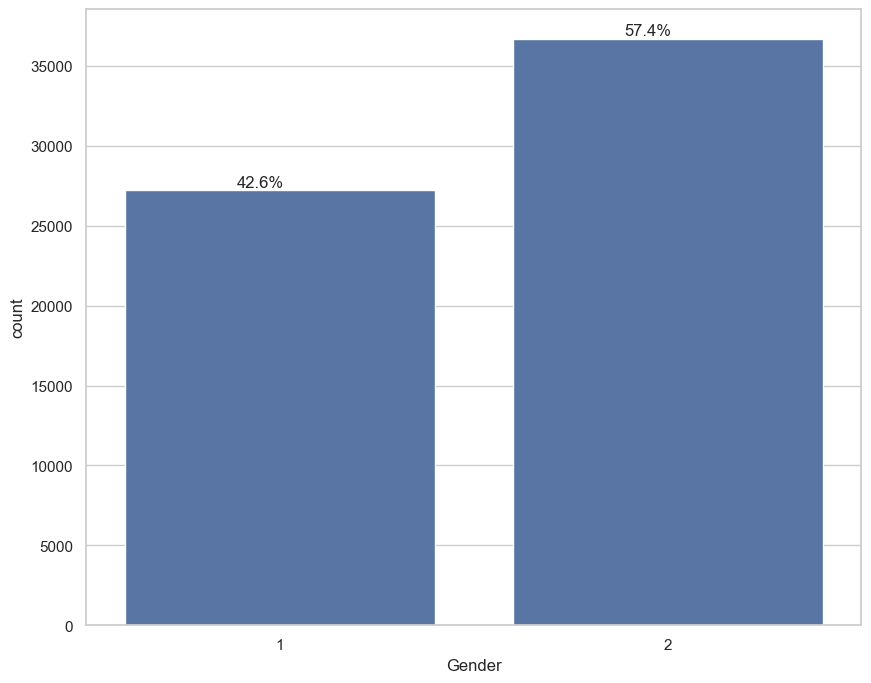

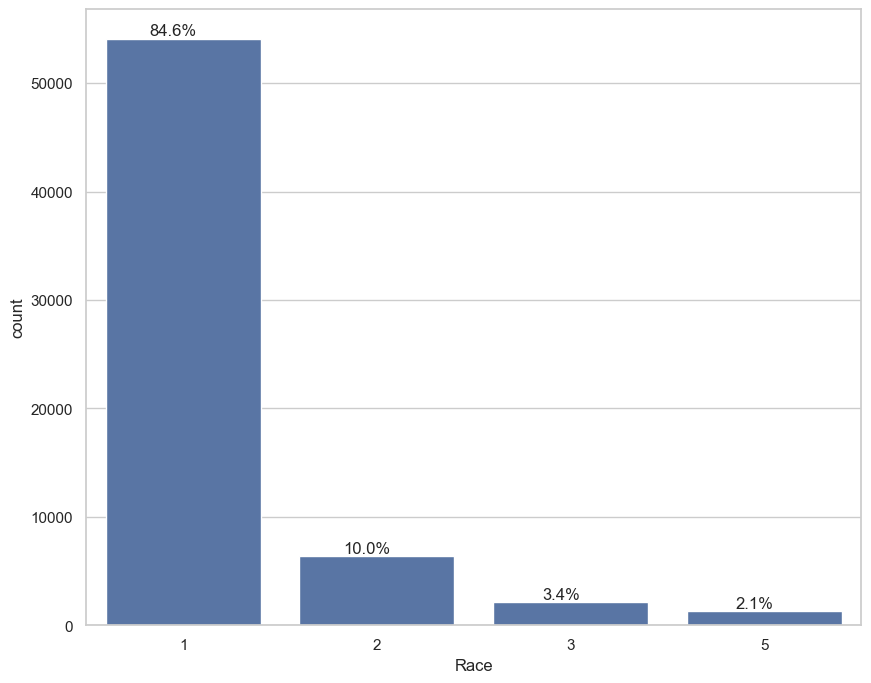

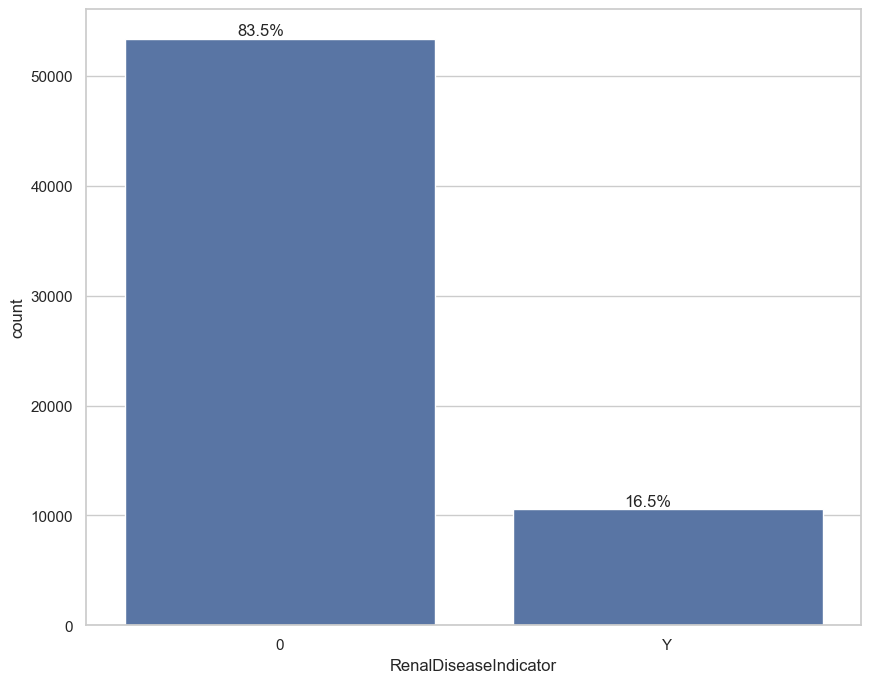

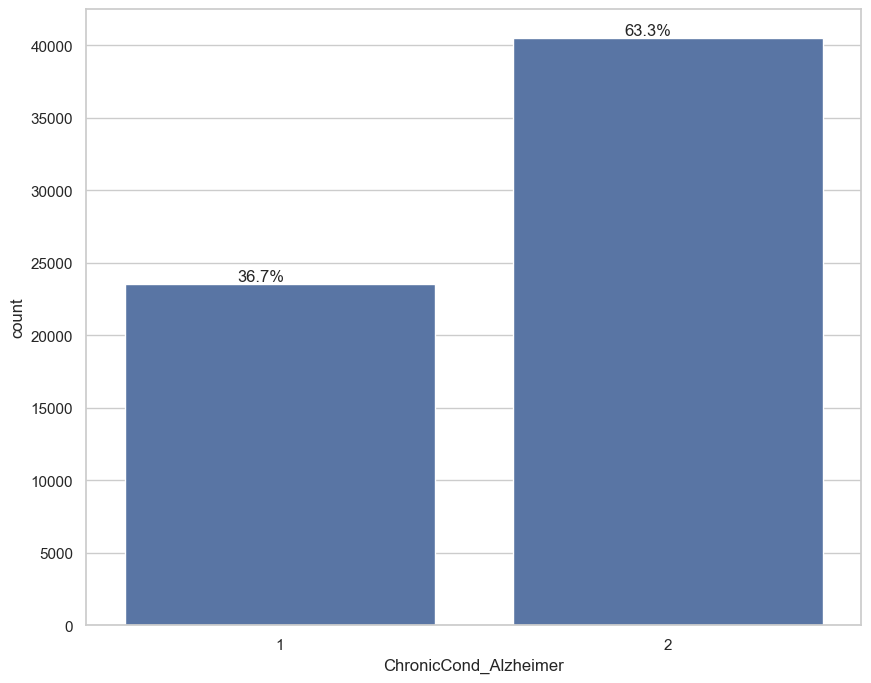

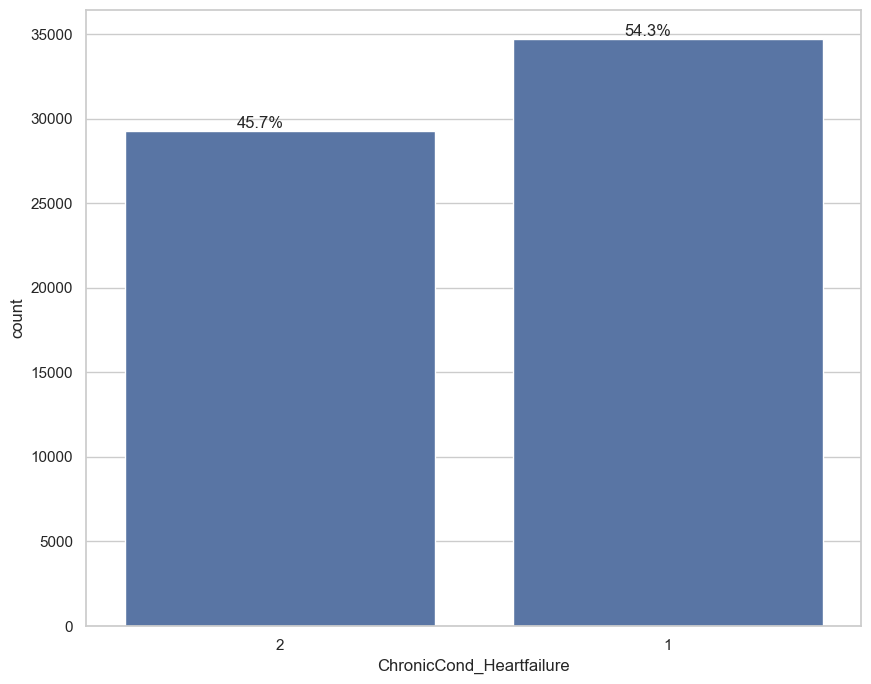

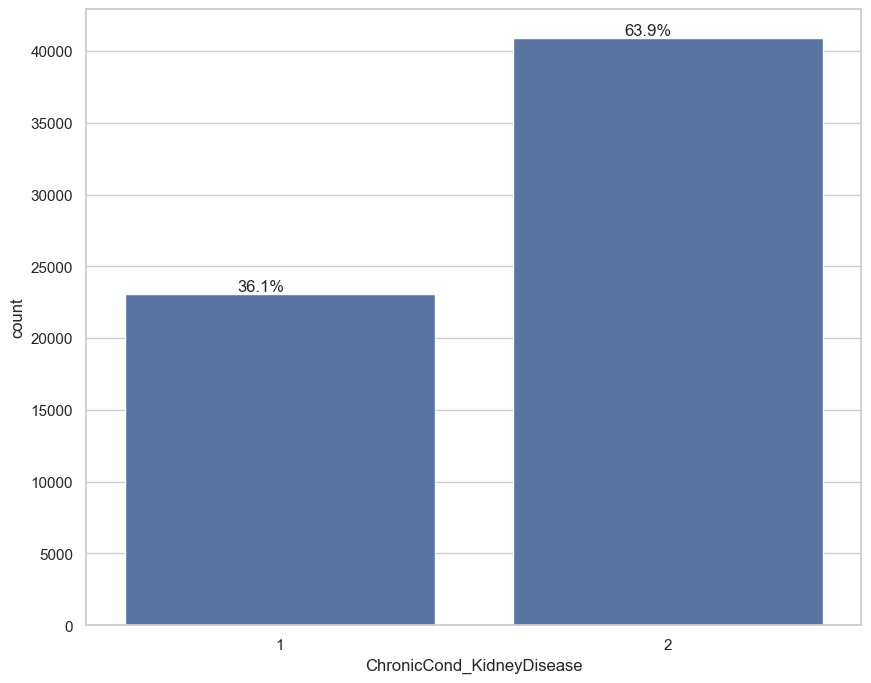

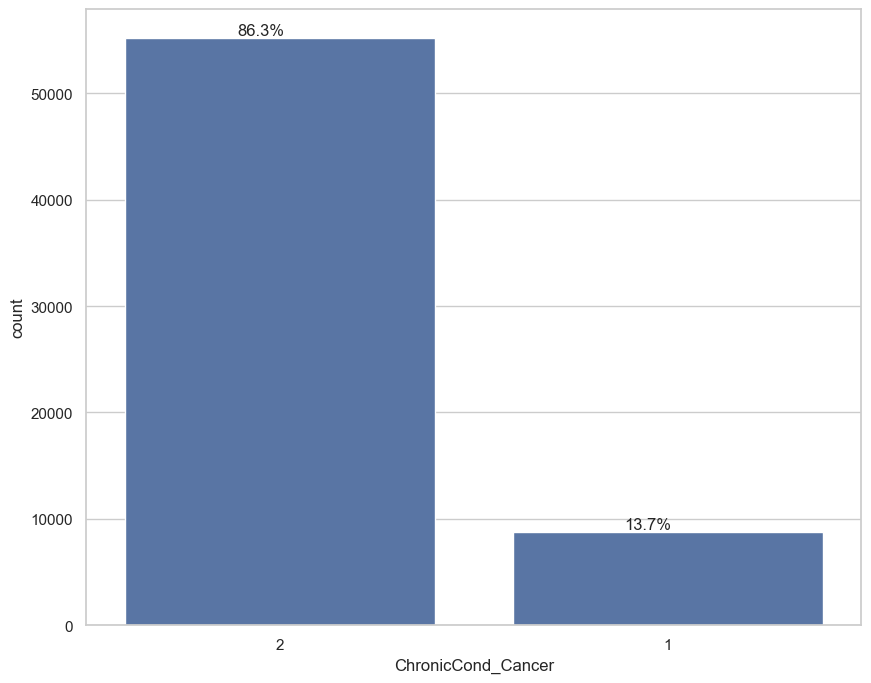

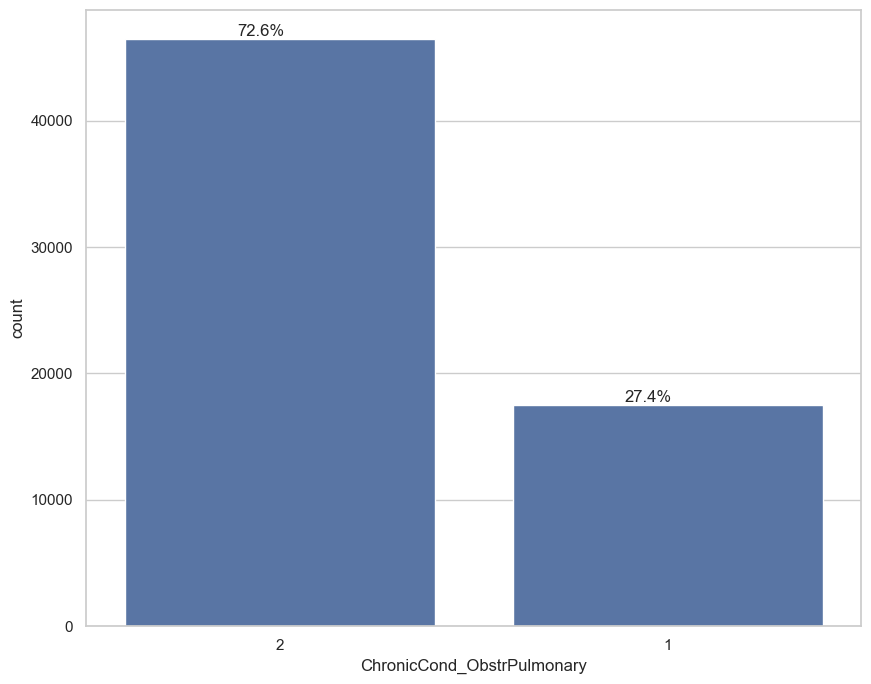

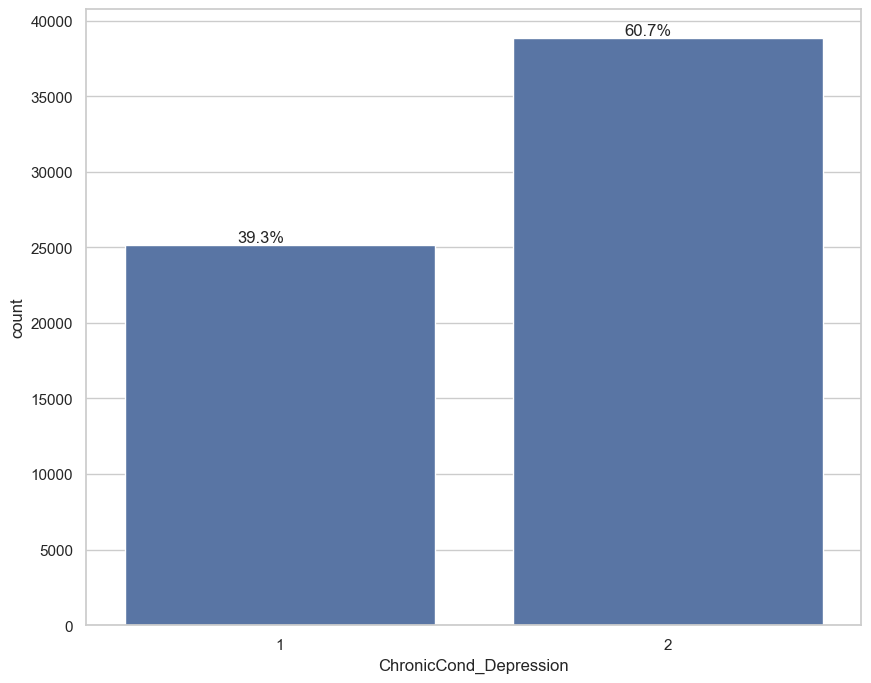

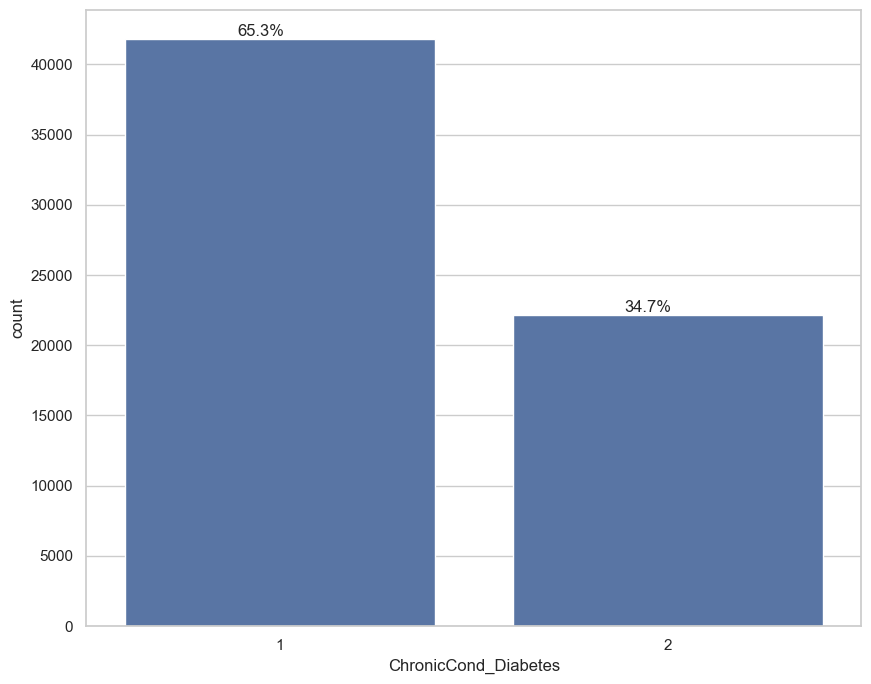

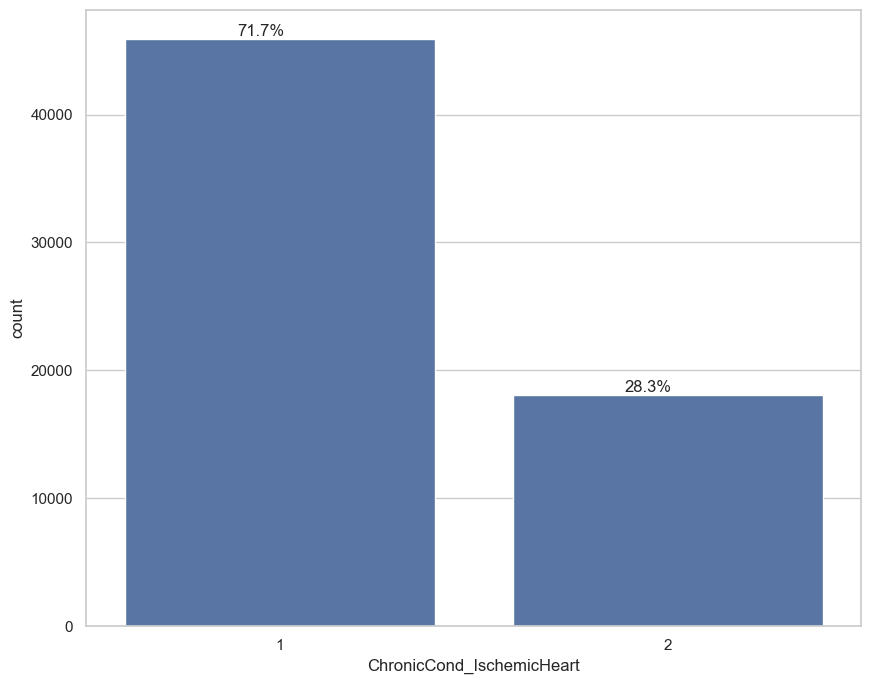

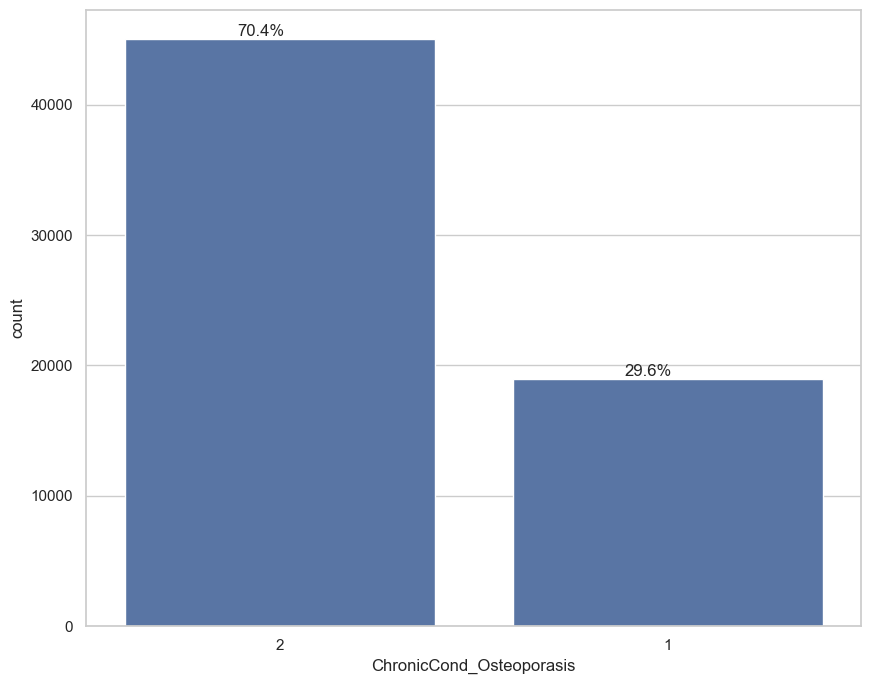

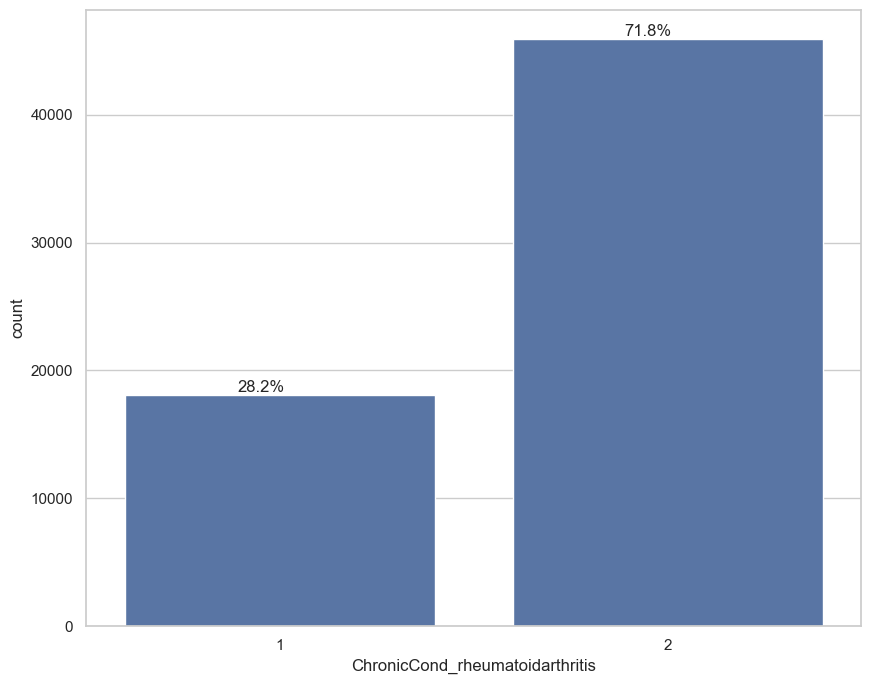

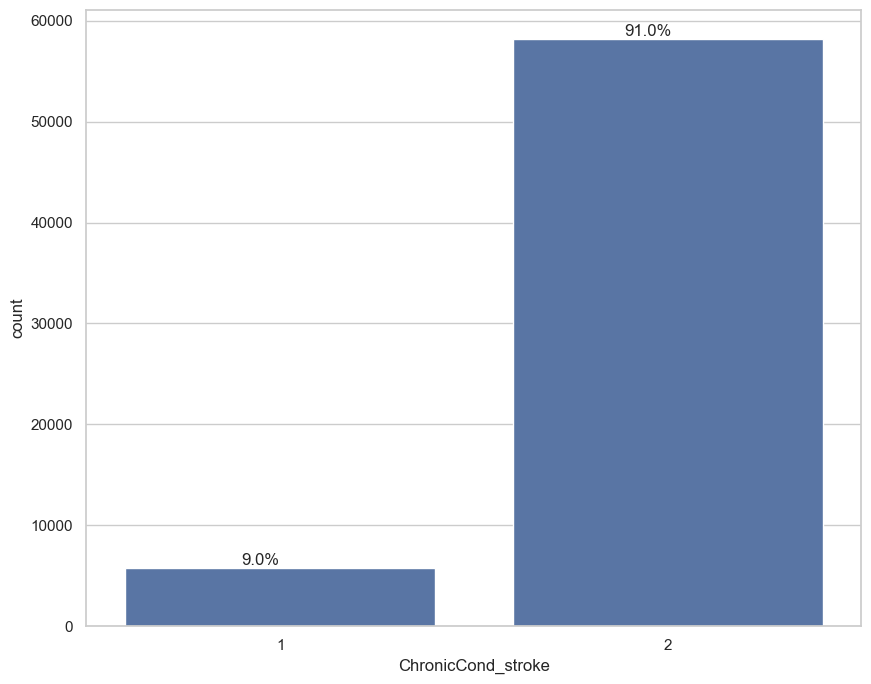

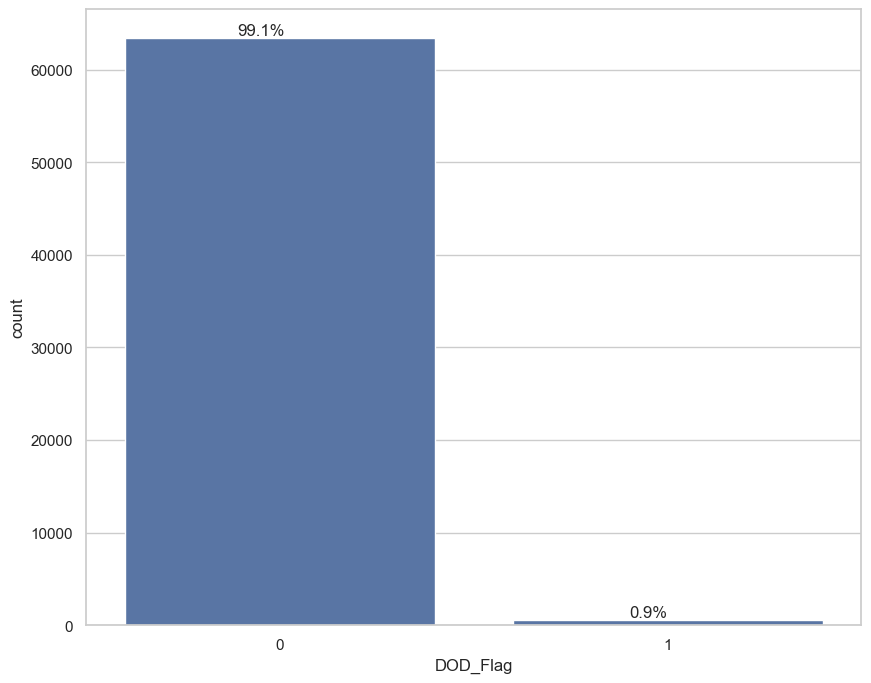

In [139]:
cat_columns_univariate(df_ben_conv)

In [57]:
def num_univariate(df):
    for i in int_cols:
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.histplot(data=df, x=i, bins=5,  kde=True)


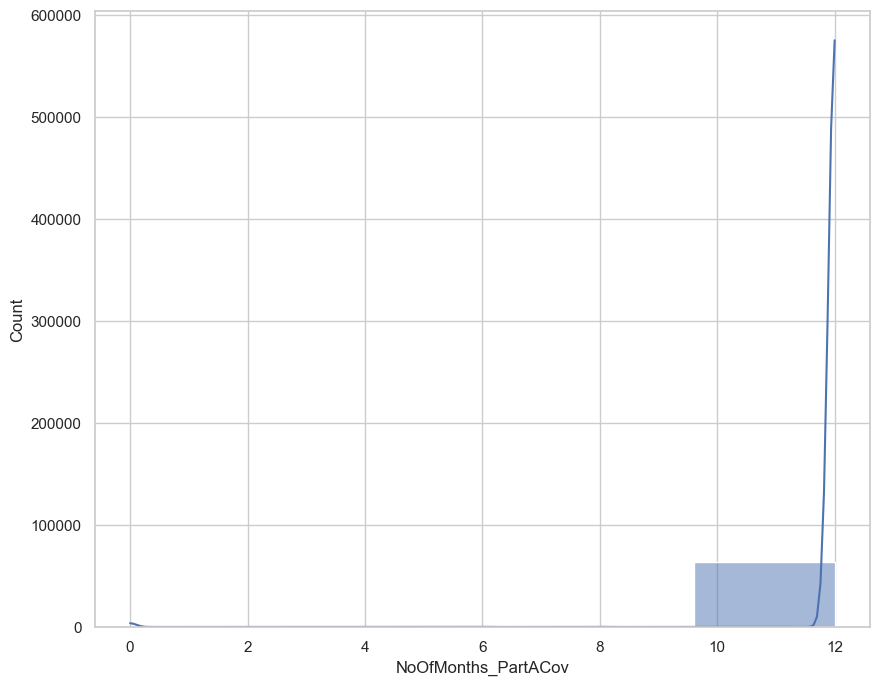

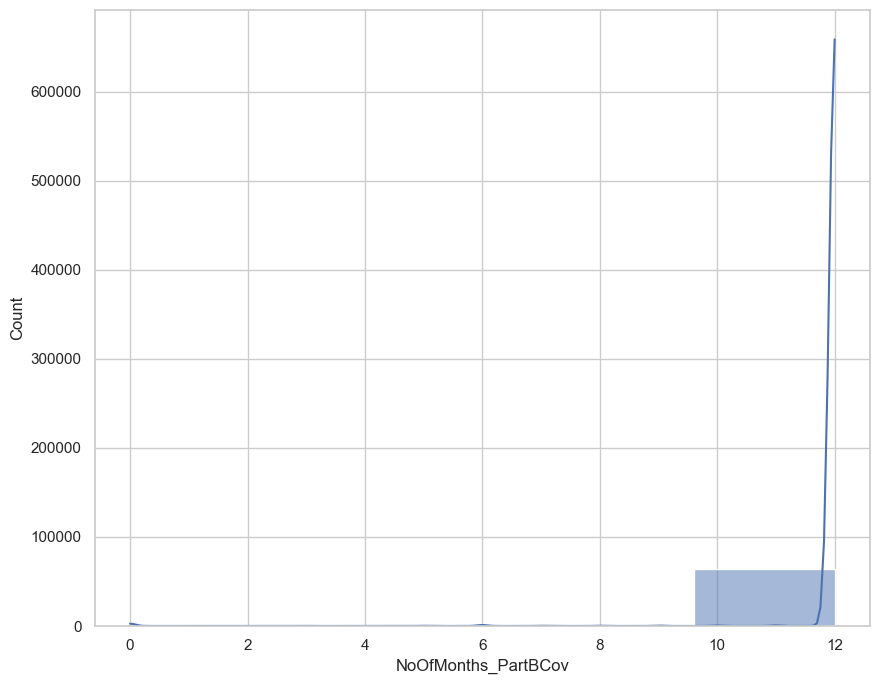

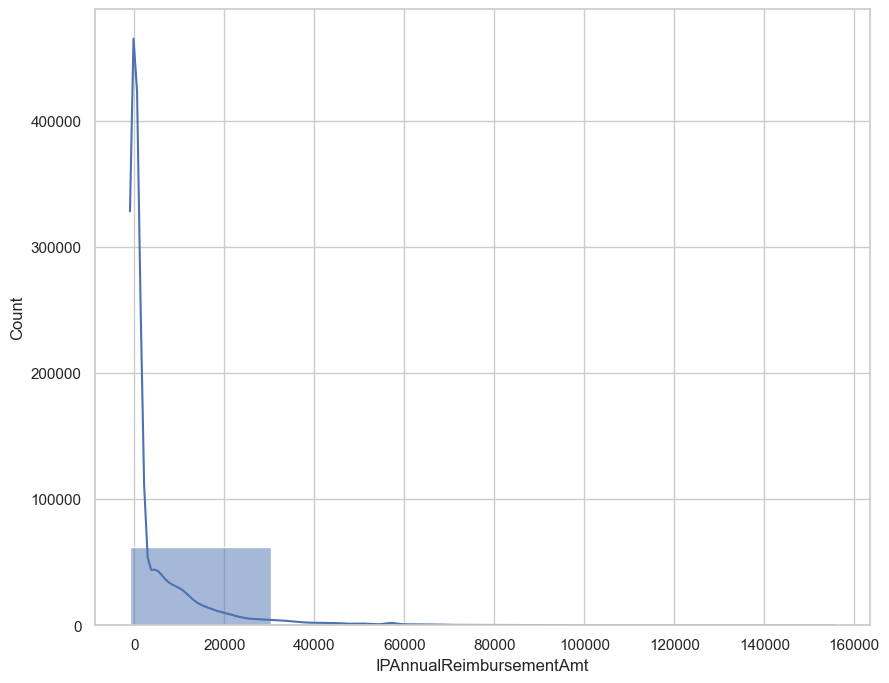

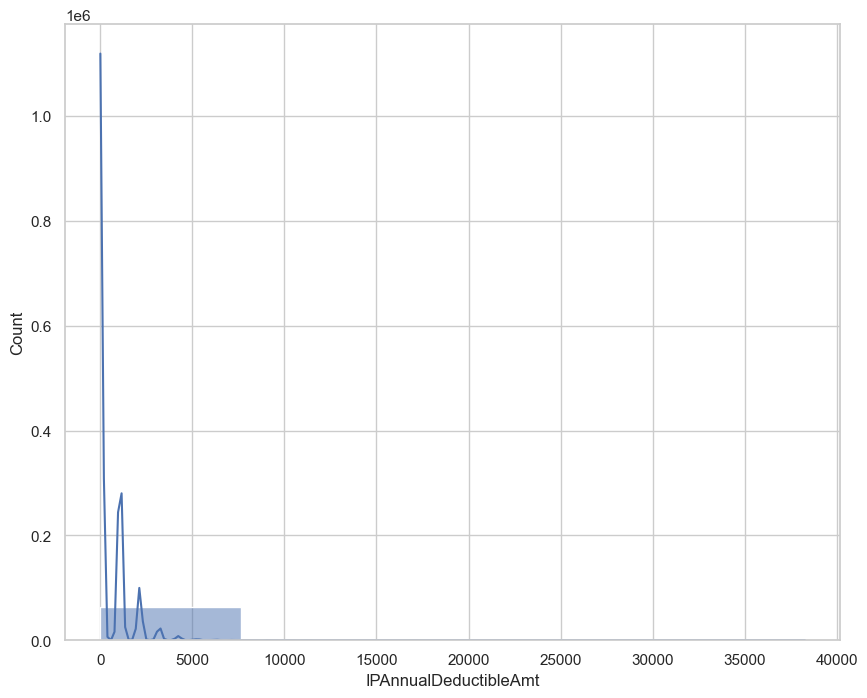

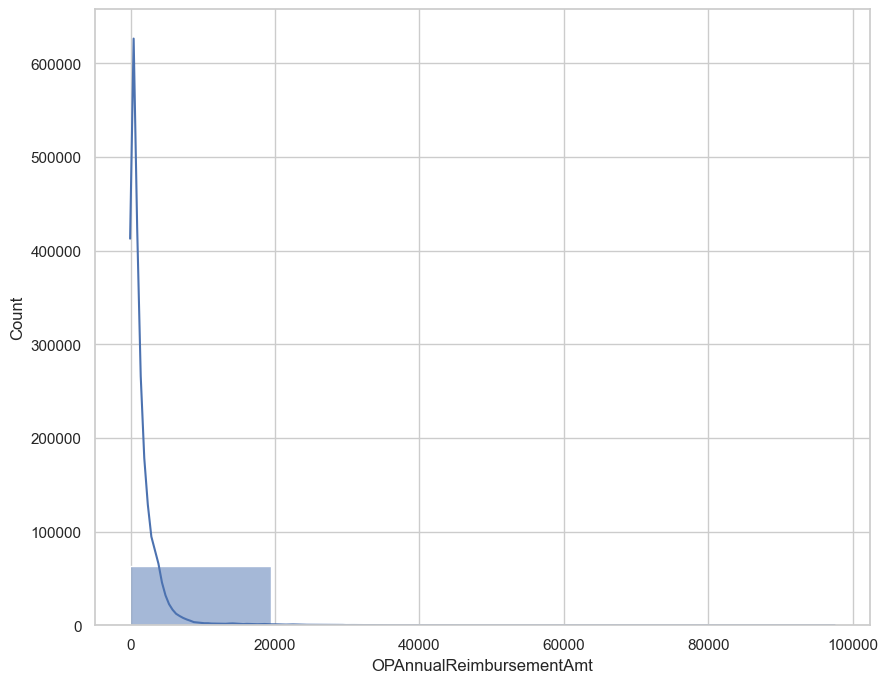

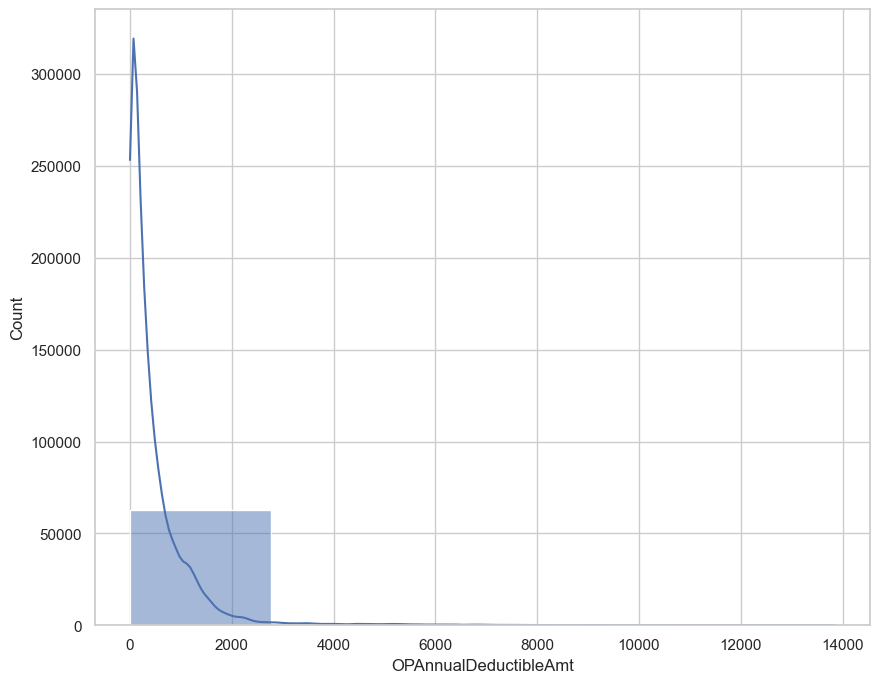

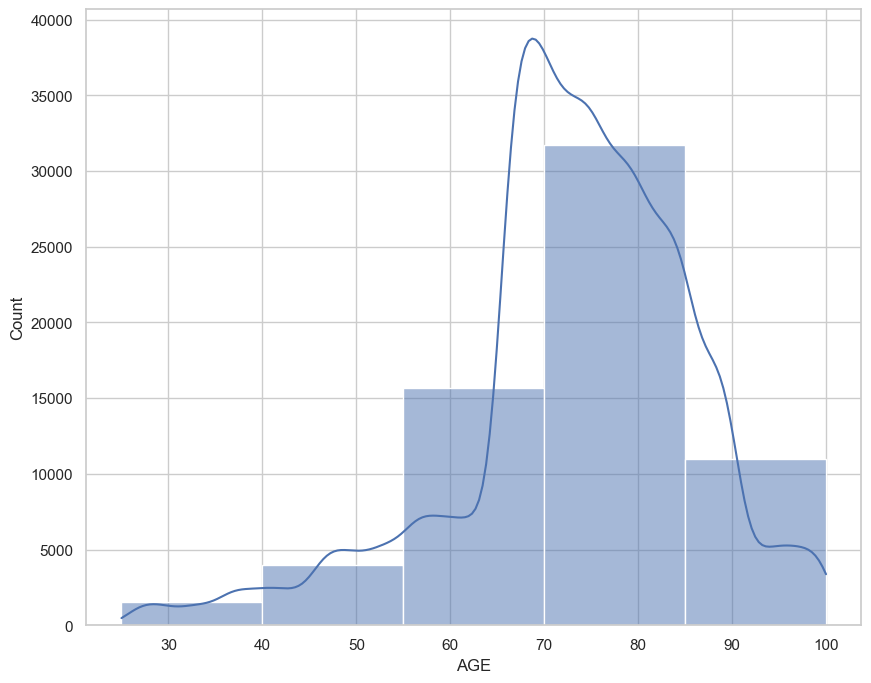

In [141]:
num_univariate(df_ben_conv)

#Outlier Analysis

In [58]:
def outlier_analysis(df):
    for i in int_cols:
        sns.boxplot(data=df[i])
        plt.show()

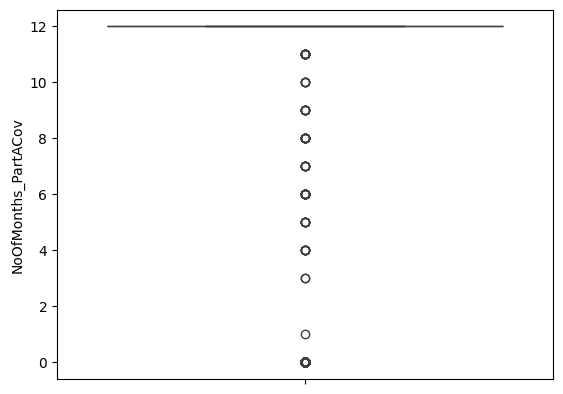

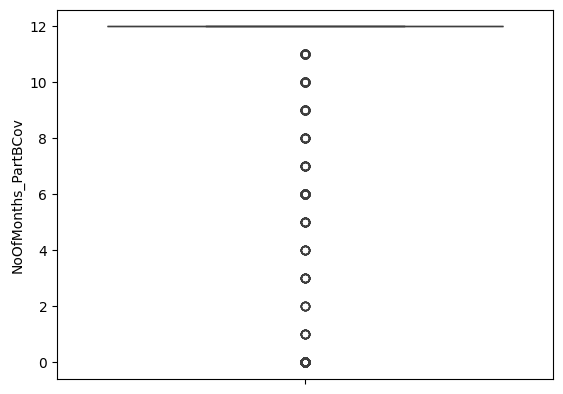

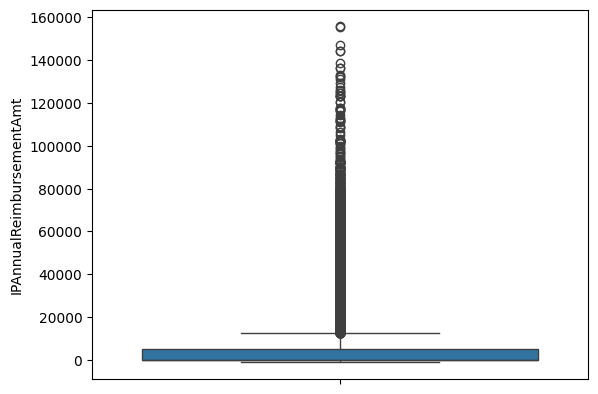

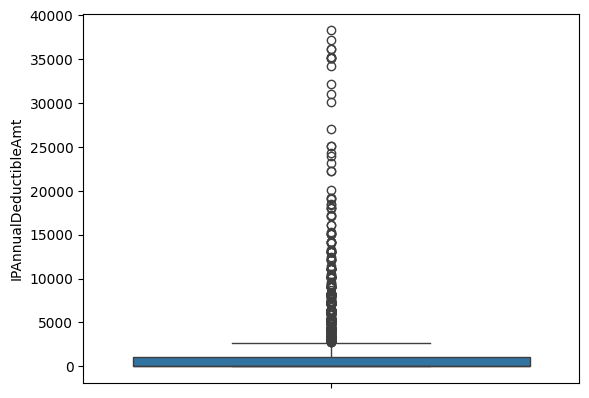

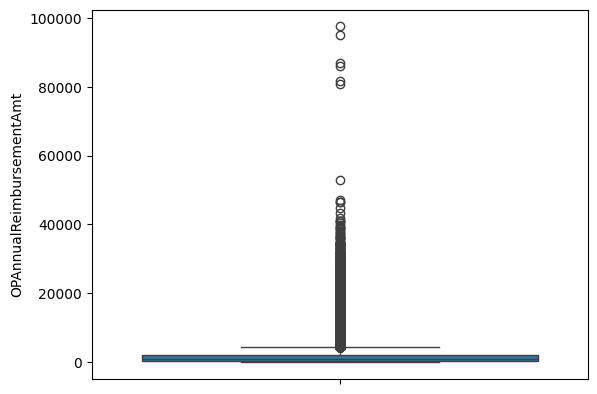

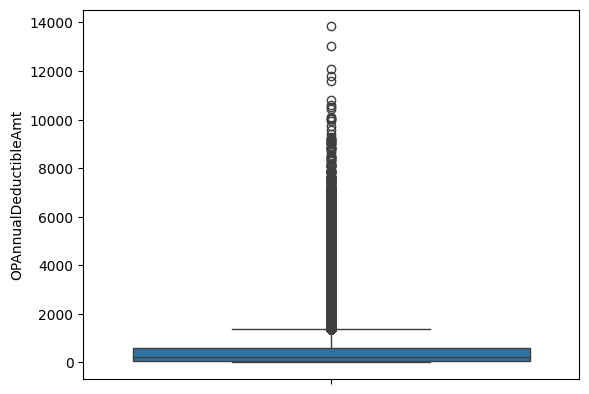

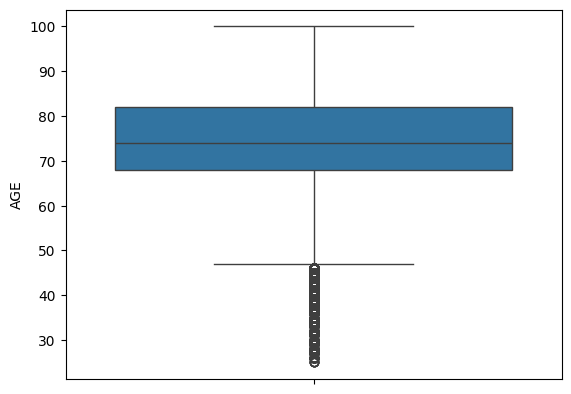

In [25]:
outlier_analysis(df_ben_conv)

**In Patient File**

In [26]:
df_inp.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [27]:
df_inp.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BeneID,9551,8351,BENE115325,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimID,9551,9551,CLM47313,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimStartDt,9551,392,2009-02-01,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimEndDt,9551,365,2009-06-18,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provider,9551,520,PRV53866,604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,9551.0,NaN,NaN,NaN,10105.306251,10316.862711,0.0,4000.0,7000.0,12000.0,125000.0
AttendingPhysician,9520,2657,PHY329480,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingPhysician,5589,1870,PHY350998,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherPhysician,1013,658,PHY335869,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdmissionDt,9551,392,2009-02-01,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_inp.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

In [29]:
df_inp_conv=type_conv(df_inp,config_data,"datetime_columns_inp","obj_columns_inp","int_columns_inp")

In [30]:
df_inp_conv.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
AdmissionDt               datetime64[ns]
ClmAdmitDiagnosisCode             object
DeductibleAmtPaid                  int64
DischargeDt               datetime64[ns]
DiagnosisGroupCode                object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode

In [31]:
df_inp.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid            0
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1           0
ClmProcedureCode_2           0
ClmProcedureCode_3           0
ClmProcedureCode_4           0
ClmProcedureCode_5           0
ClmProcedureCode_6           0
dtype: int64

In [32]:
df_inp_conv.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
BeneID,9551,8351,BENE115325,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimID,9551,9551,CLM47313,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimStartDt,9551,NaN,NaN,NaN,2009-06-21 16:46:41.298293248,2008-11-27 00:00:00,2009-03-23 00:00:00,2009-06-19 00:00:00,2009-09-18 00:00:00,2009-12-31 00:00:00,NaN
ClaimEndDt,9551,NaN,NaN,NaN,2009-06-27 11:06:24.085435904,2009-01-01 00:00:00,2009-03-28 00:00:00,2009-06-25 00:00:00,2009-09-24 00:00:00,2009-12-31 00:00:00,NaN
Provider,9551,520,PRV53866,604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,9551.0,NaN,NaN,NaN,10105.306251,0.0,4000.0,7000.0,12000.0,125000.0,10316.862711
AttendingPhysician,9520,2657,PHY329480,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingPhysician,5589,1870,PHY350998,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherPhysician,1013,658,PHY335869,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdmissionDt,9551,NaN,NaN,NaN,2009-06-21 16:27:23.388126720,2008-11-27 00:00:00,2009-03-23 00:00:00,2009-06-19 00:00:00,2009-09-18 00:00:00,2009-12-31 00:00:00,NaN


In [140]:
for i in df_inp_conv.columns:
    print("++++++"+i+"+++++++++++++")
    print(df_inp_conv[i].value_counts())

++++++BeneID+++++++++++++
BeneID
BENE115325    6
BENE39898     6
BENE137036    5
BENE67334     5
BENE24688     5
             ..
BENE158382    1
BENE158393    1
BENE158396    1
BENE158398    1
BENE11221     1
Name: count, Length: 8351, dtype: int64
++++++ClaimID+++++++++++++
ClaimID
CLM47313    1
CLM67387    1
CLM31237    1
CLM78930    1
CLM56810    1
           ..
CLM45661    1
CLM78388    1
CLM33681    1
CLM72781    1
CLM65874    1
Name: count, Length: 9551, dtype: int64
++++++ClaimStartDt+++++++++++++
ClaimStartDt
2009-02-01    40
2009-04-10    38
2009-02-20    38
2009-09-04    37
2009-03-24    37
              ..
2008-12-14     1
2008-12-08     1
2008-12-02     1
2009-12-31     1
2008-12-18     1
Name: count, Length: 392, dtype: int64
++++++ClaimEndDt+++++++++++++
ClaimEndDt
2009-06-18    43
2009-04-08    41
2009-02-21    41
2009-08-08    40
2009-01-26    39
              ..
2009-08-29    15
2009-05-01    15
2009-01-04    15
2009-08-13    14
2009-10-29    10
Name: count, Length: 36

In [167]:
def feature_addition_inp(dataset_conv):
 
    dataset_conv['Claim_period']=np.round(((dataset_conv['ClaimEndDt'] - dataset_conv['ClaimStartDt']).dt.days),1)
    dataset_conv['Admit_Period']=np.round(((dataset_conv['DischargeDt'] - dataset_conv['AdmissionDt']).dt.days),1)
    dataset_conv['Beneficiary_cost']=(dataset_conv['InscClaimAmtReimbursed'] - dataset_conv['DeductibleAmtPaid'])
    diagnosis_code_columns = ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4',
                              'ClmDiagnosisCode_5','ClmDiagnosisCode_6',
                            'ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']
    diagnosis_proc_columns = ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4',
                              'ClmProcedureCode_5','ClmProcedureCode_6']
                           
    dataset_conv['Count_diag_code']=dataset_conv[diagnosis_code_columns].notna().sum(axis=1)
    for i in diagnosis_proc_columns:
        df_inp_conv[i].replace('nan', np.nan,inplace=True)
    dataset_conv['Count_proc_code']=dataset_conv[diagnosis_proc_columns].notna().sum(axis=1)
    
   
    
    

In [168]:
feature_addition_inp(df_inp_conv)

/var/folders/nd/f34czdrj02175j4j_k03vfyw0000gp/T/ipykernel_5759/2358442537.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_inp_conv[i].replace('nan', np.nan,inplace=True)


In [169]:
df_inp_conv[df_inp_conv.BeneID=='BENE115325']

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_period,Admit_Period,Beneficiary_cost,Count_diag_code,Count_proc_code
6677,BENE115325,CLM42940,2009-03-17,2009-04-04,PRV56913,13000,PHY425437,PHY354407,NaN,2009-03-17,...,496.0,2724.0,NaN,NaN,NaN,18,18,11932,9,3
6678,BENE115325,CLM48131,2009-04-23,2009-04-28,PRV57090,20000,PHY328387,PHY328387,PHY328387,2009-04-23,...,5733.0,4019.0,NaN,NaN,NaN,5,5,18932,9,3
6679,BENE115325,CLM49426,2009-05-02,2009-05-12,PRV57090,18000,PHY328387,PHY328387,NaN,2009-05-02,...,5185.0,NaN,NaN,NaN,NaN,10,10,16932,9,2
6680,BENE115325,CLM53800,2009-06-02,2009-06-08,PRV56815,11000,PHY421394,PHY421394,NaN,2009-06-02,...,NaN,NaN,NaN,NaN,NaN,6,6,9932,9,1
6681,BENE115325,CLM58592,2009-07-06,2009-07-17,PRV56913,6000,PHY425437,NaN,NaN,2009-07-06,...,NaN,NaN,NaN,NaN,NaN,11,11,4932,9,0
6682,BENE115325,CLM72696,2009-10-20,2009-10-24,PRV56629,12000,PHY344633,NaN,NaN,2009-10-20,...,NaN,NaN,NaN,NaN,NaN,4,4,10932,10,0


In [164]:
df_inp_conv[['Claim_period','Admit_Period','Beneficiary_cost','Count_diag_code','Count_proc_code']].nunique()

Claim_period         36
Admit_Period         36
Beneficiary_cost    133
Count_diag_code      10
Count_proc_code       6
dtype: int64

In [170]:
def col_separation(dataset):
    cat_cols=dataset.select_dtypes('object').columns.to_list()
    int_cols=dataset.select_dtypes('int64').columns.to_list()
    time_cols=dataset.select_dtypes('datetime64[ns]').columns.to_list()
    return cat_cols,int_cols,time_cols

In [177]:
cat_cols

['BeneID',
 'ClaimID',
 'Provider',
 'AttendingPhysician',
 'OperatingPhysician',
 'OtherPhysician',
 'ClmAdmitDiagnosisCode',
 'DiagnosisGroupCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5']

In [171]:
cat_cols=col_separation(df_inp_conv)[0]
int_cols=col_separation(df_inp_conv)[1]
tim_cols=col_separation(df_inp_conv)[2]

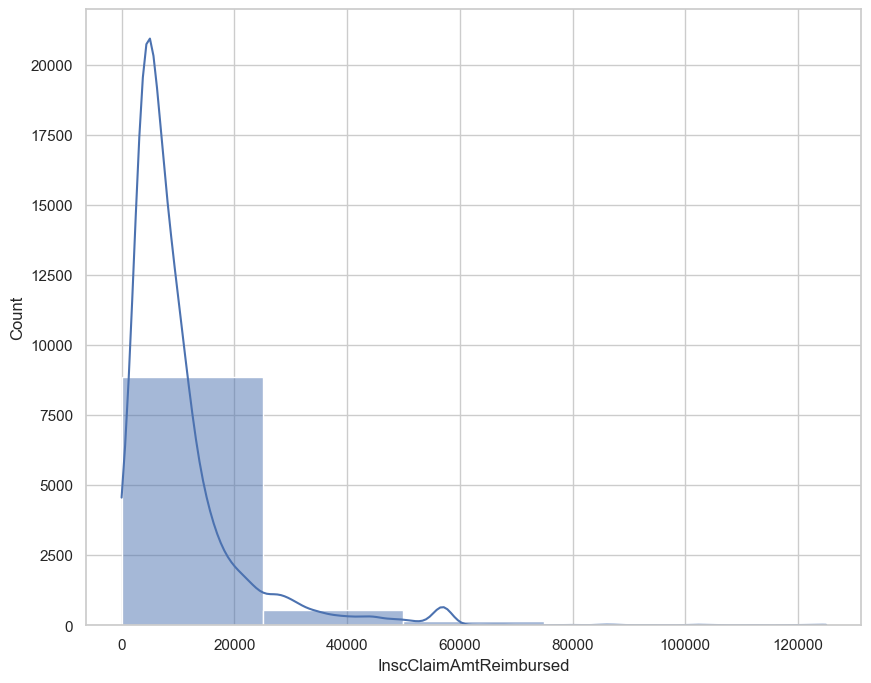

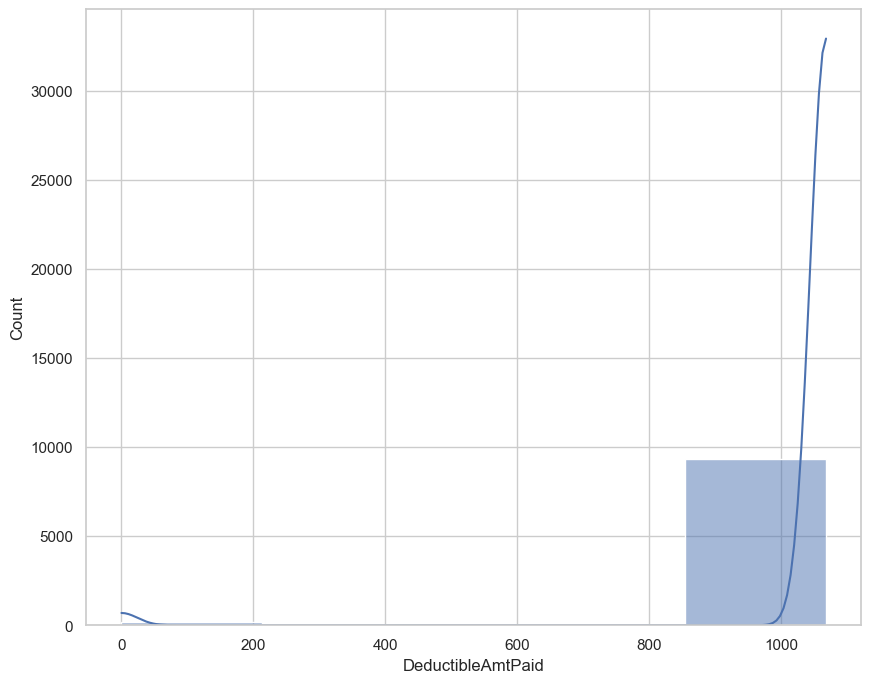

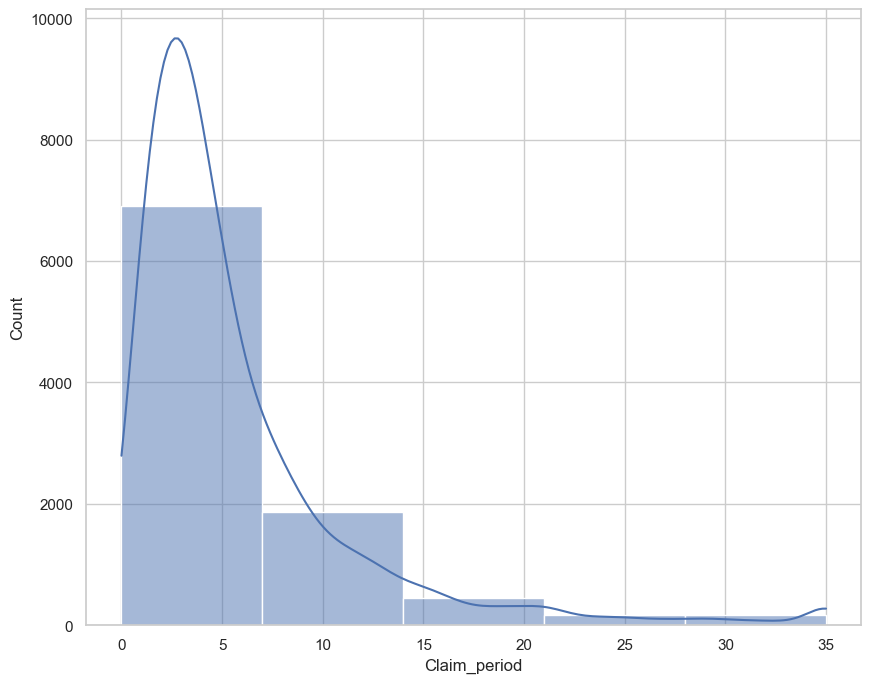

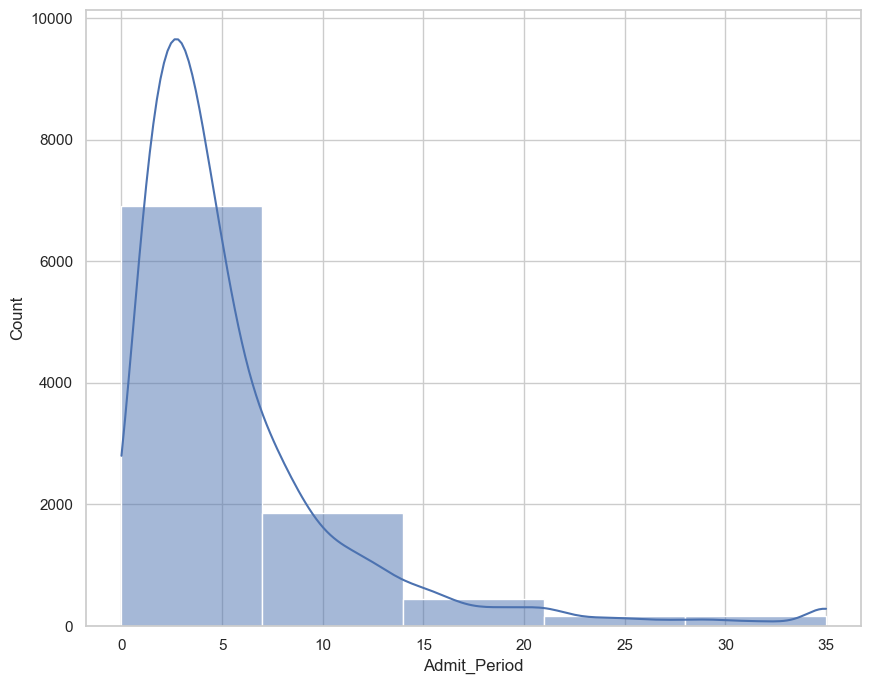

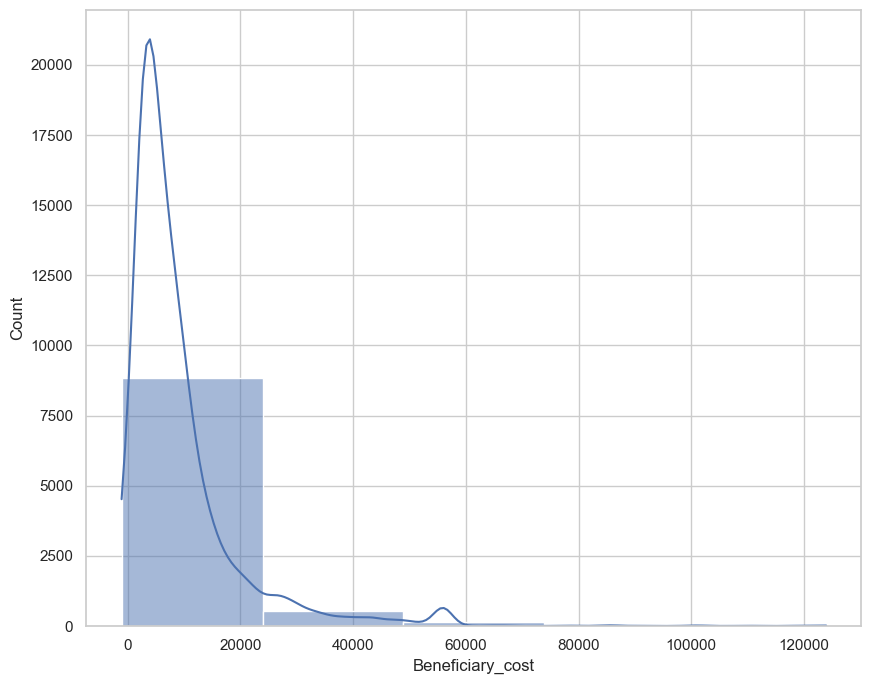

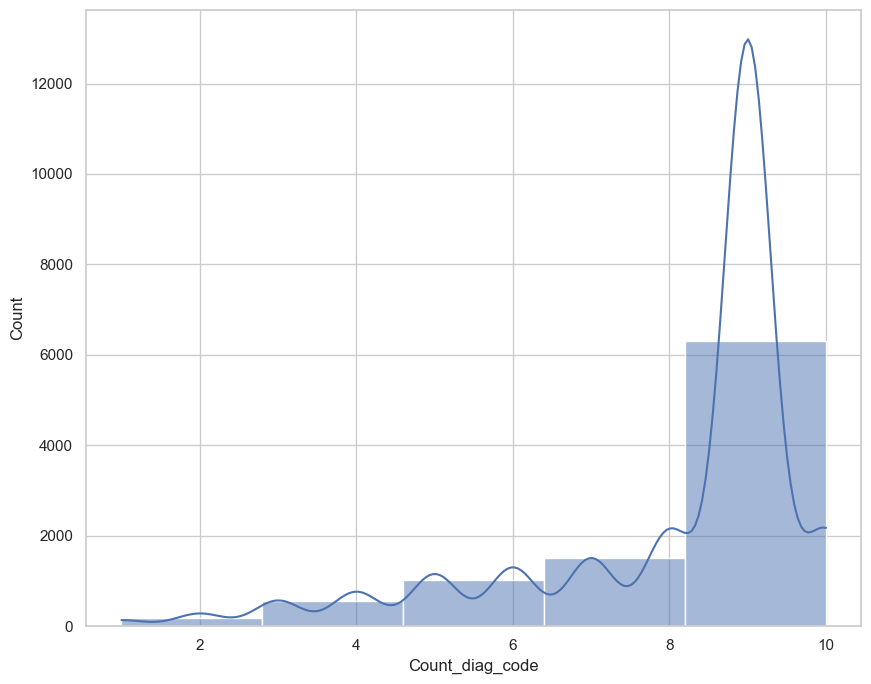

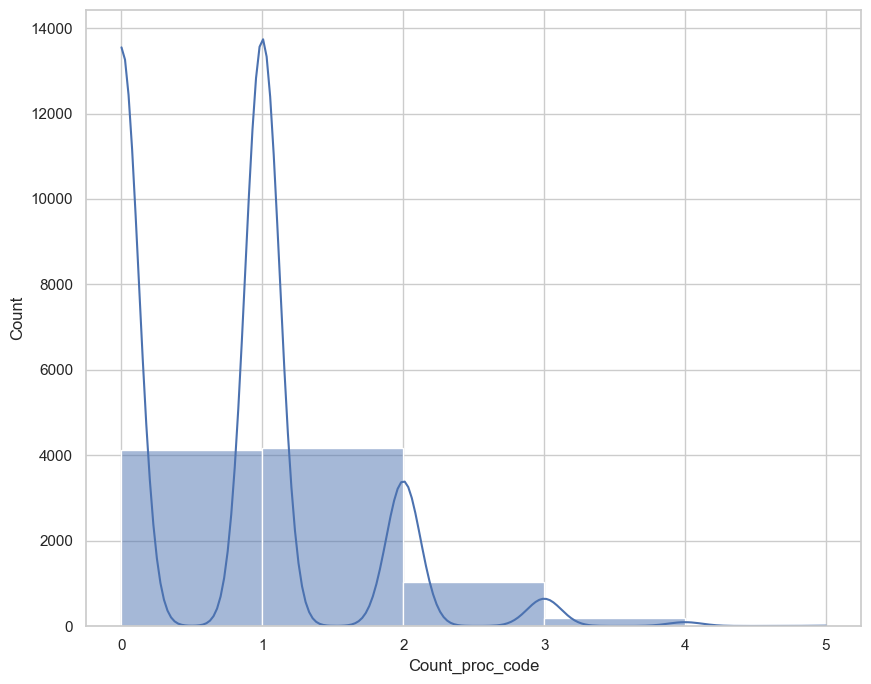

In [180]:
num_univariate(df_inp_conv)

In [59]:
def cat_columns_univariate_top_10 (df):
    sns.set_theme(style="whitegrid")
    # Loop through categorical columns
    for i in cat_cols:
        if df[i].nunique() < 10:
            fig, ax = plt.subplots(figsize=(10, 8))
            ax = sns.countplot(data=df, x=i)

            # Calculate percentages
            total = float(len(df))
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2 - 0.05
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            plt.show()
        elif 10 < df[i].nunique() :
        # Calculate value counts and sort them
            value_counts = df[i].value_counts().sort_values(ascending=False)

            # Get the top 10 values
            top_10_values = value_counts.head(10).index

            # Create a DataFrame with the sorted top 10 values
            sorted_df = pd.DataFrame({i: top_10_values, 'count': value_counts[top_10_values]})

            # Create a plot
            fig, ax = plt.subplots(figsize=(10, 8))

            # Plot using countplot with the top 10 values
            sns.countplot(data=df[df[i].isin(top_10_values)], y=i, order=top_10_values, ax=ax)


        # Calculate percentages
            total = float(len(df))
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_width() / total)
                x = p.get_width() + 2.5
                y = p.get_y() + p.get_height() / 2
                ax.annotate(percentage, (x, y), ha='center', va='center')

            plt.show()
    else:
        pass


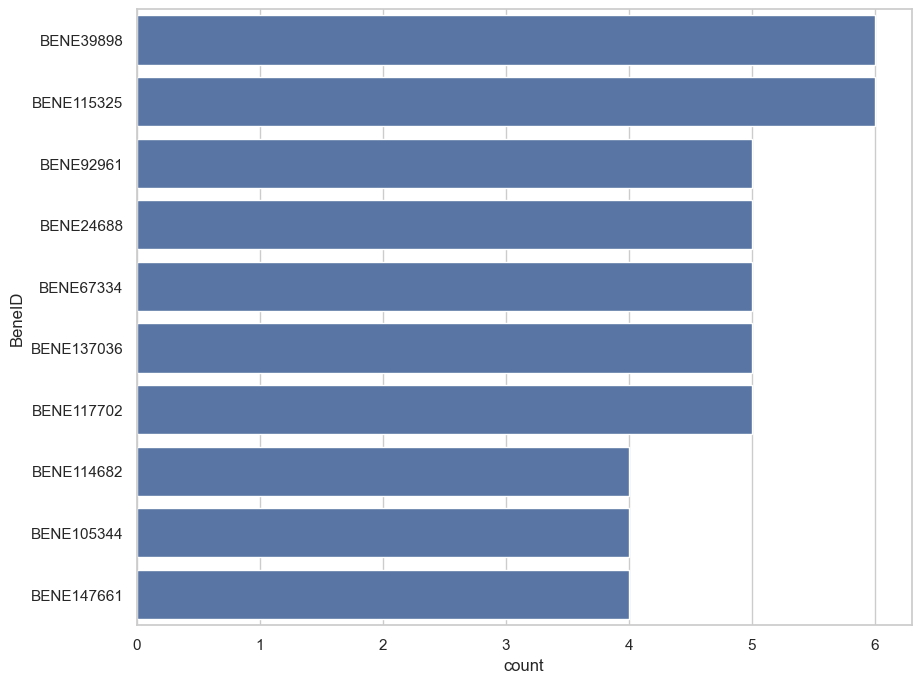

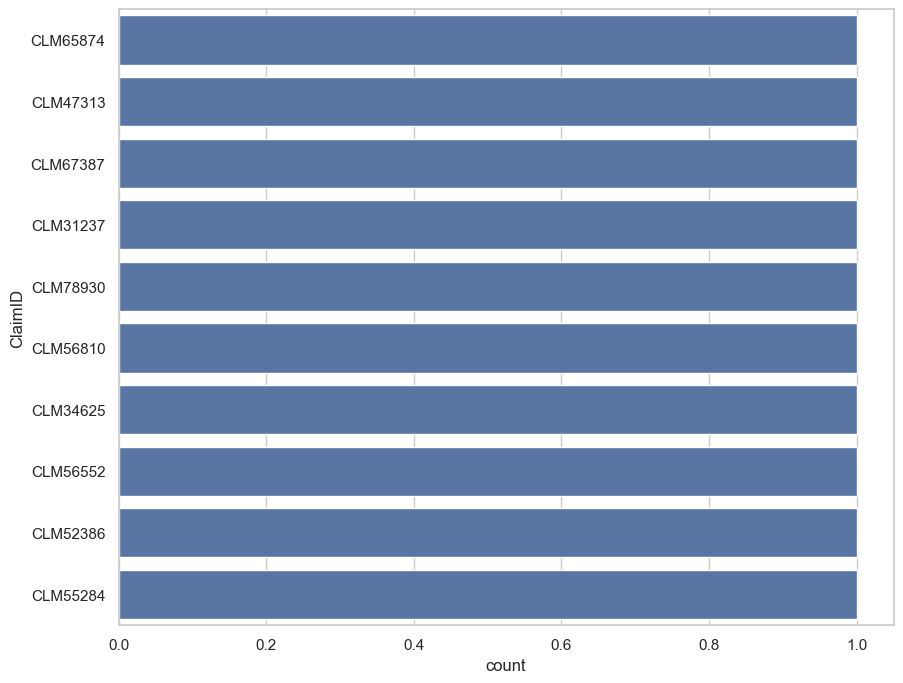

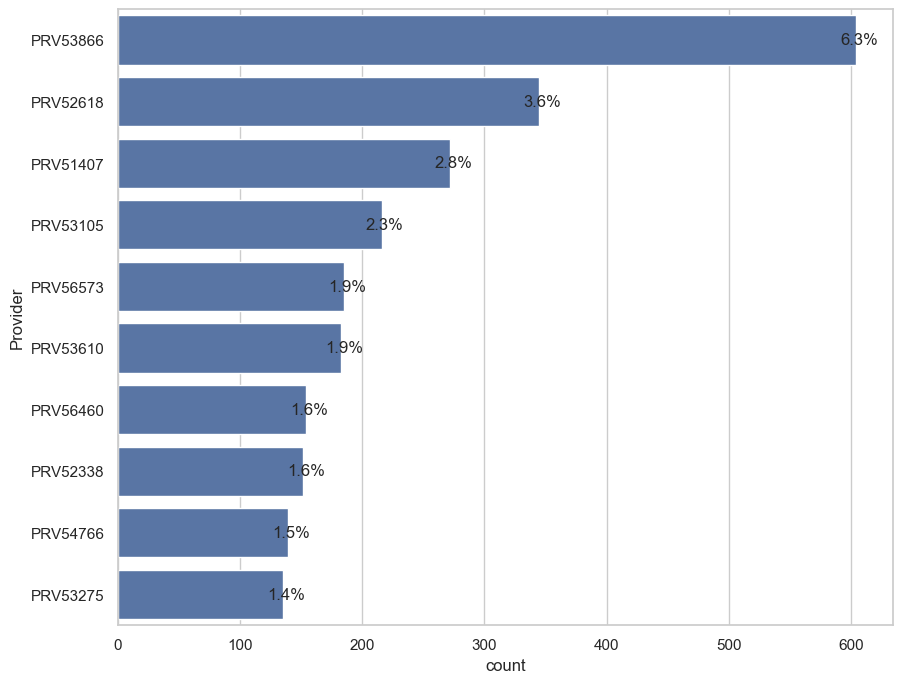

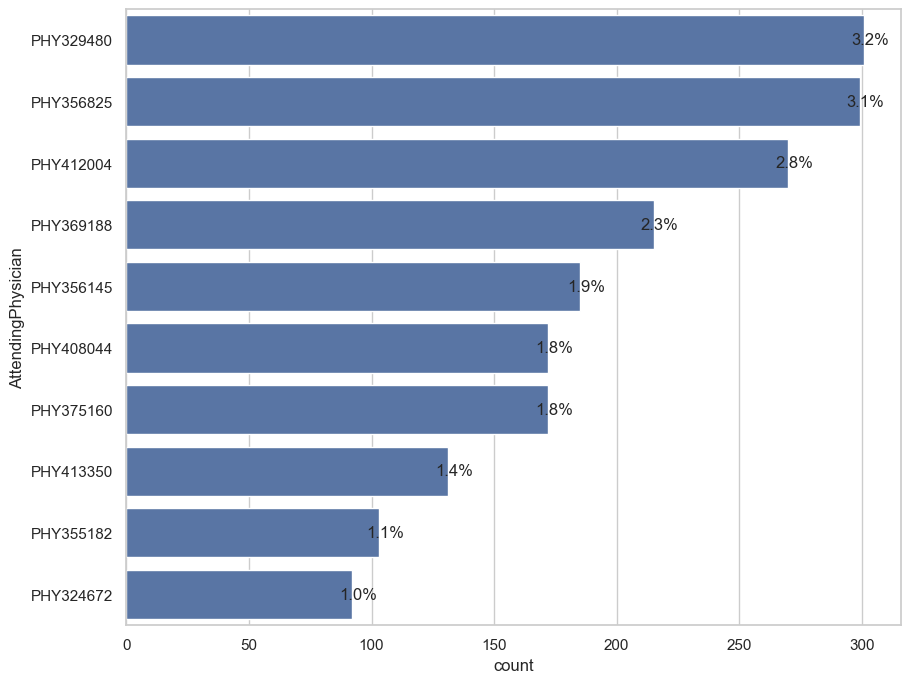

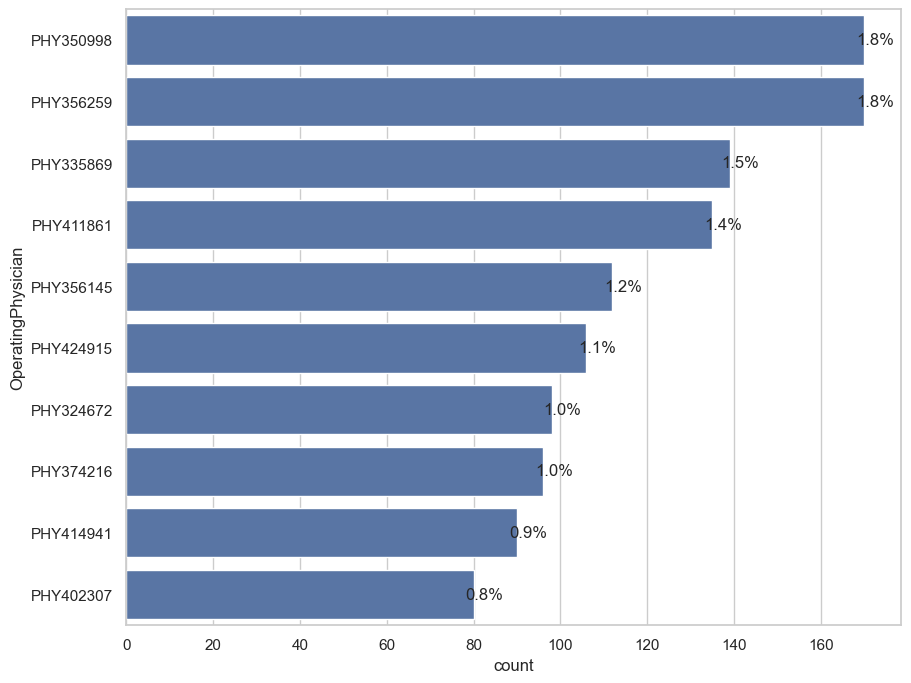

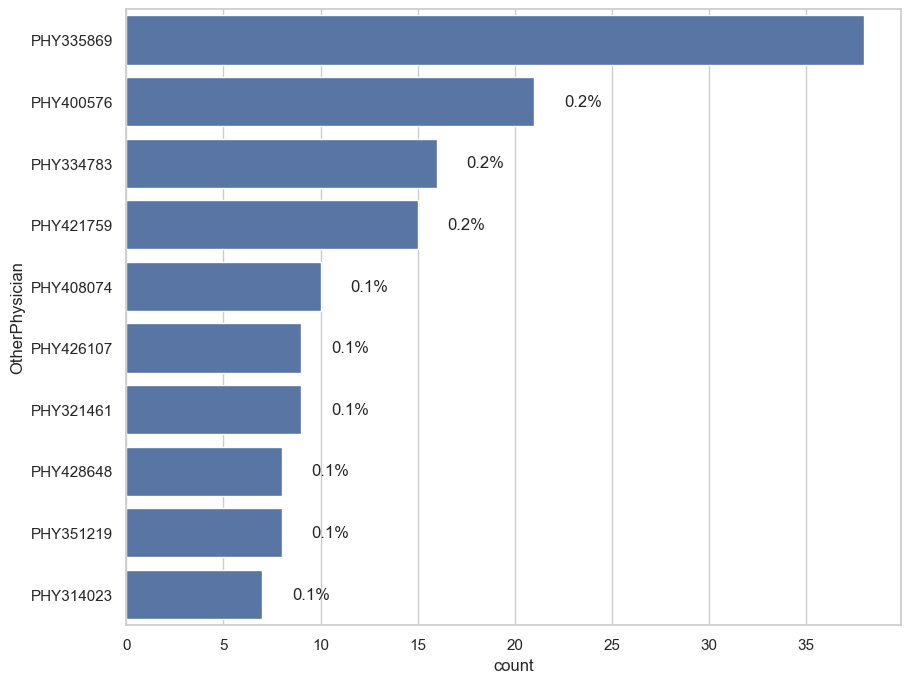

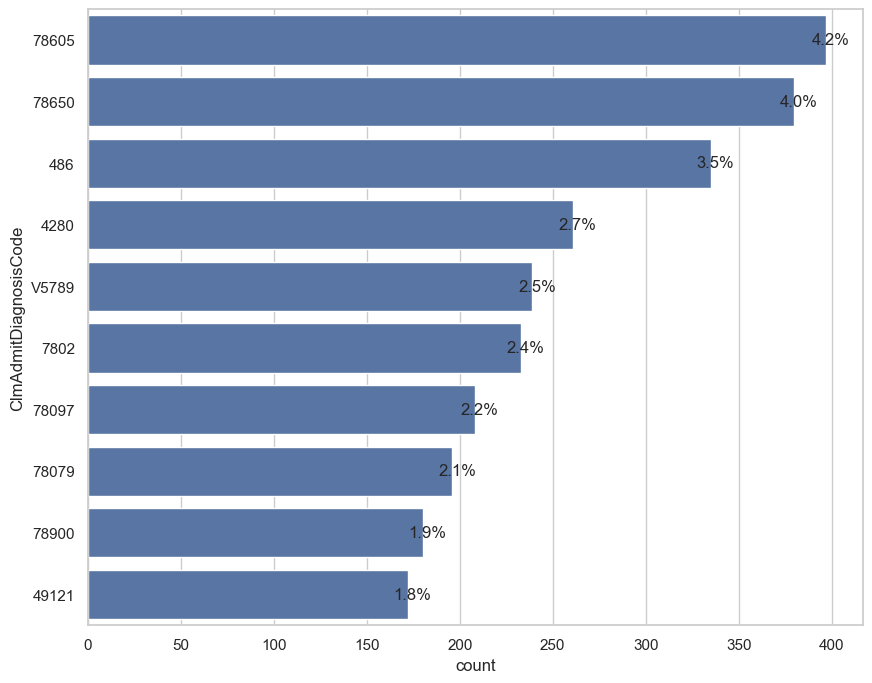

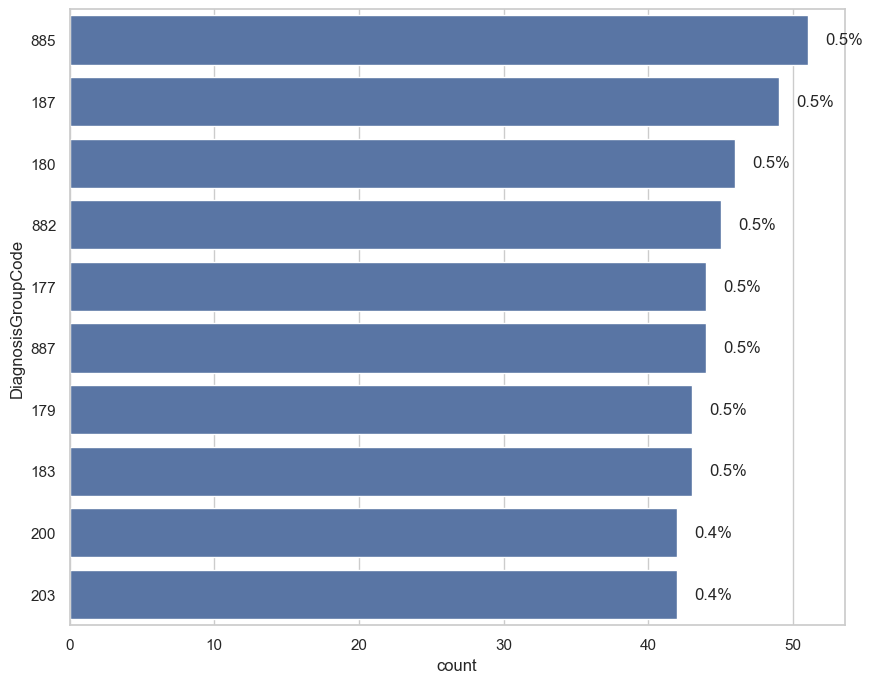

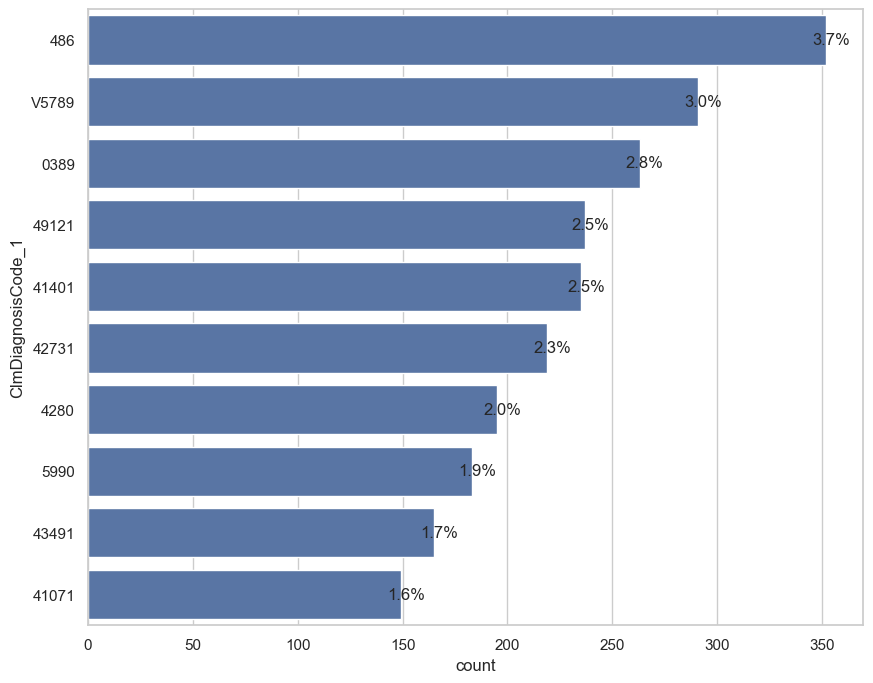

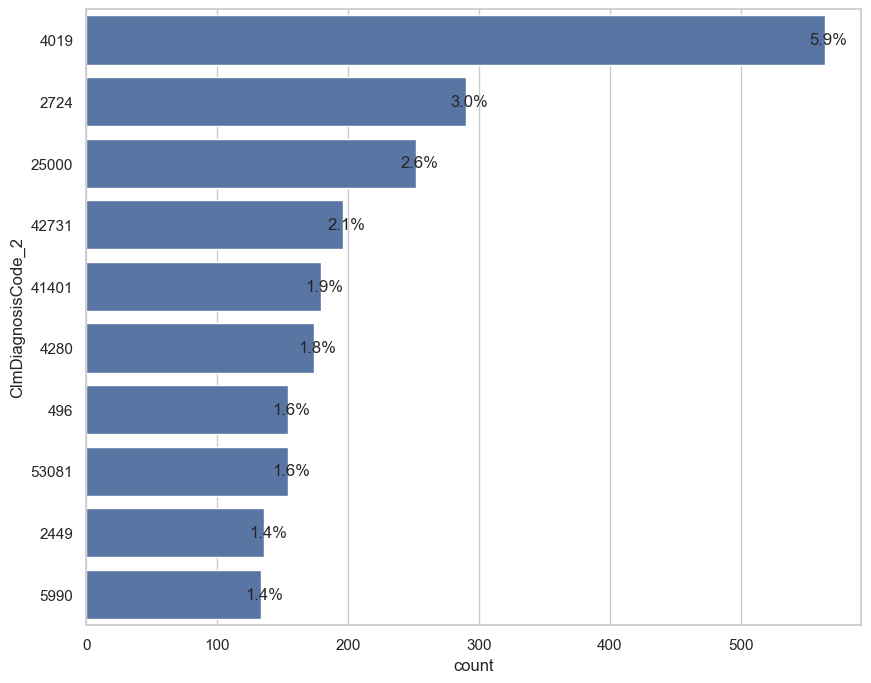

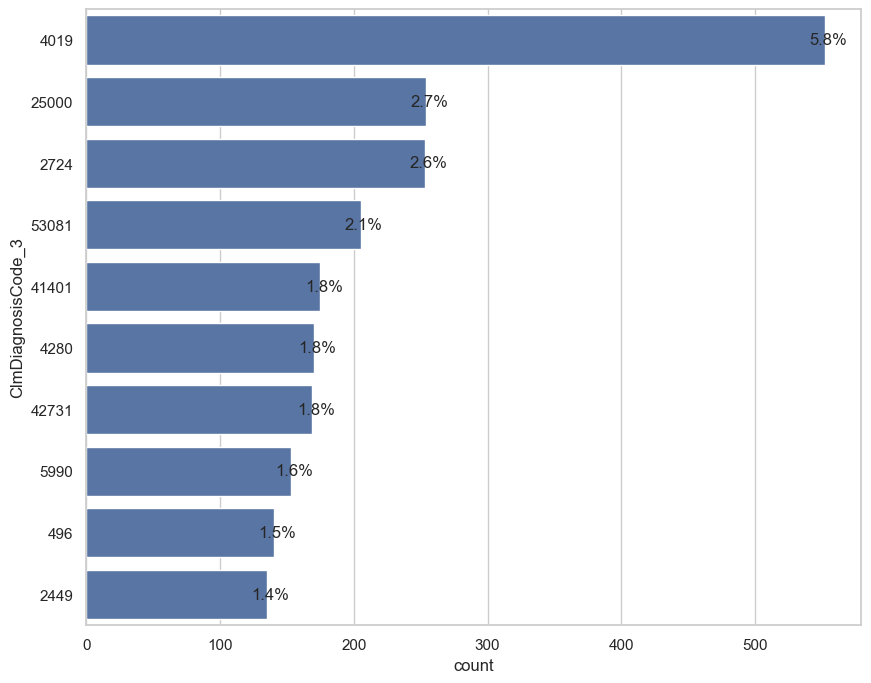

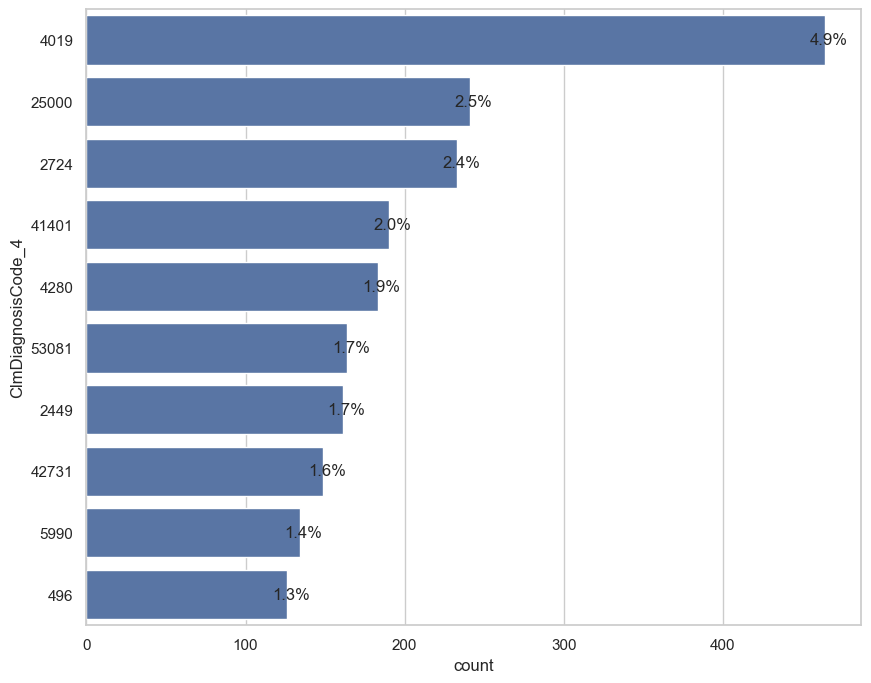

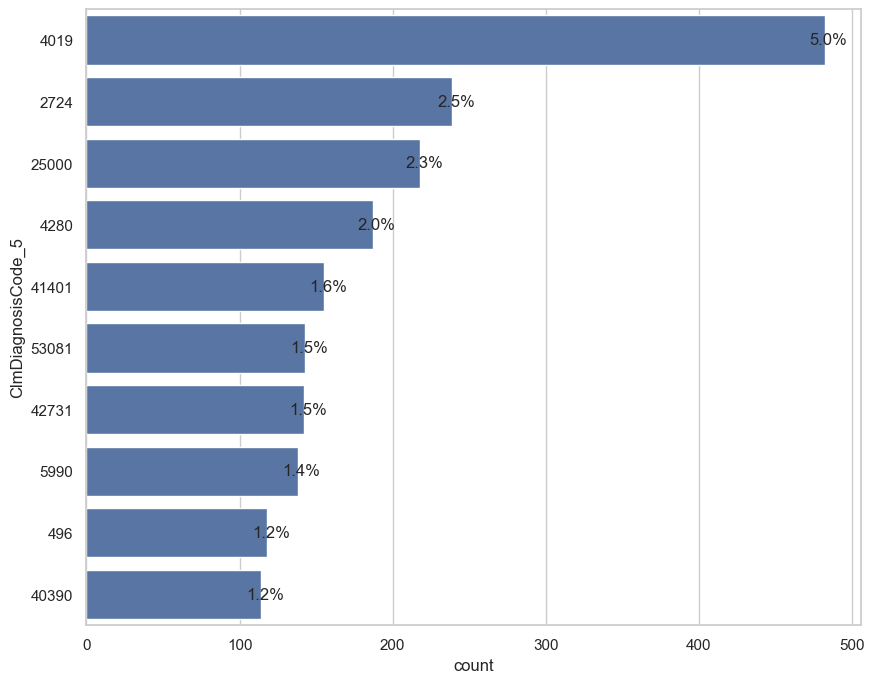

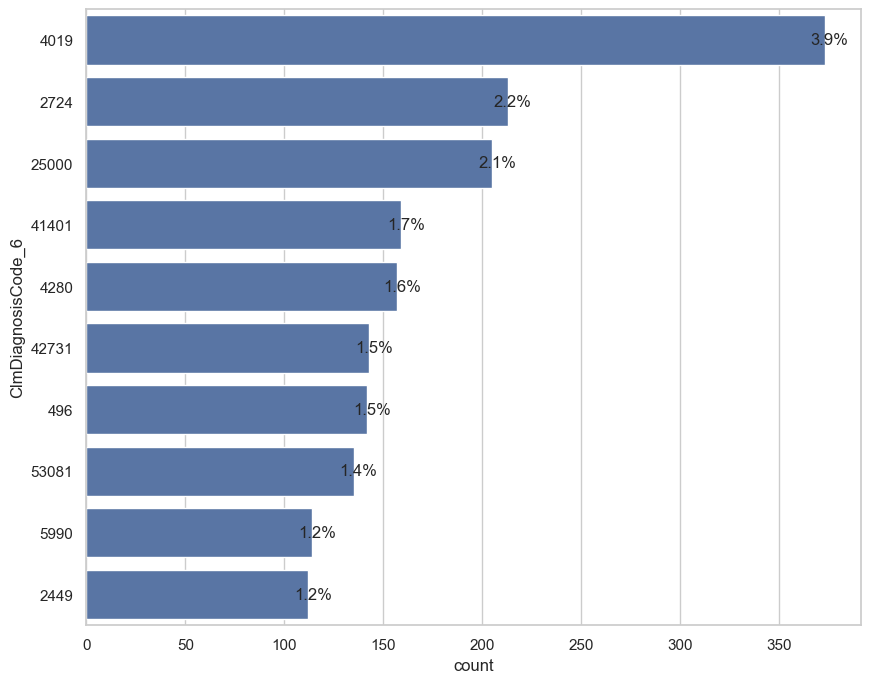

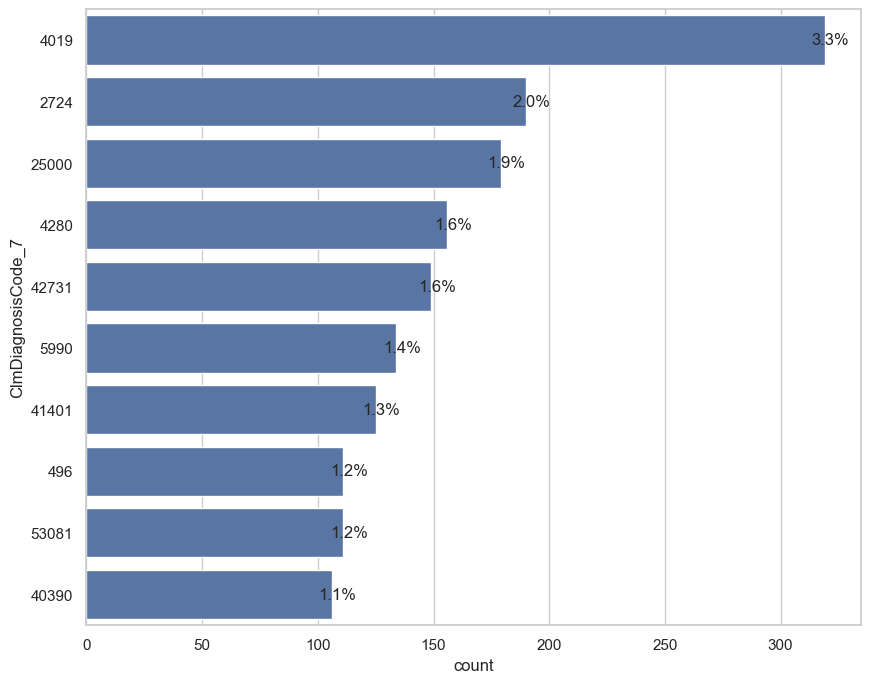

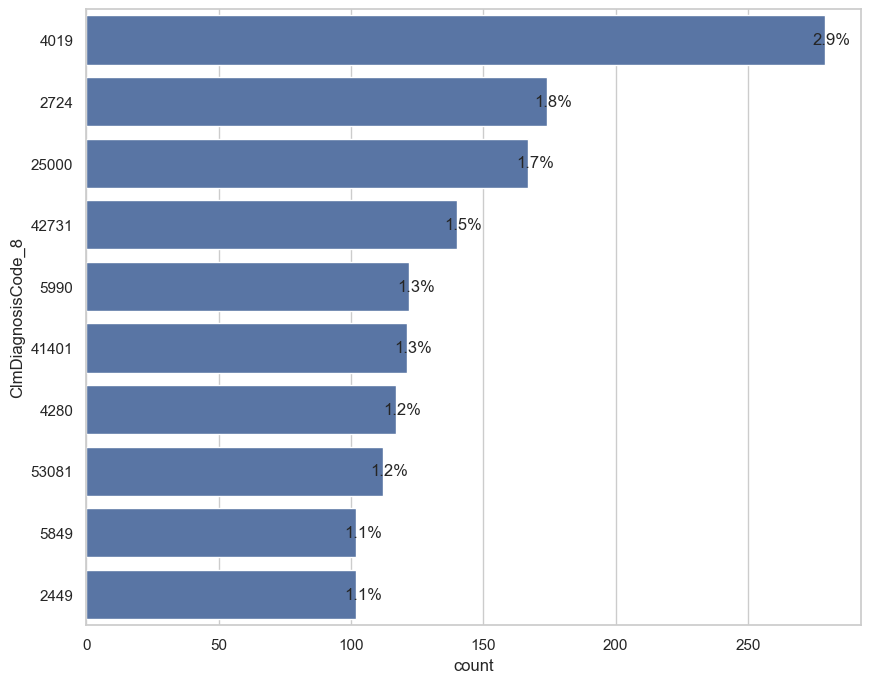

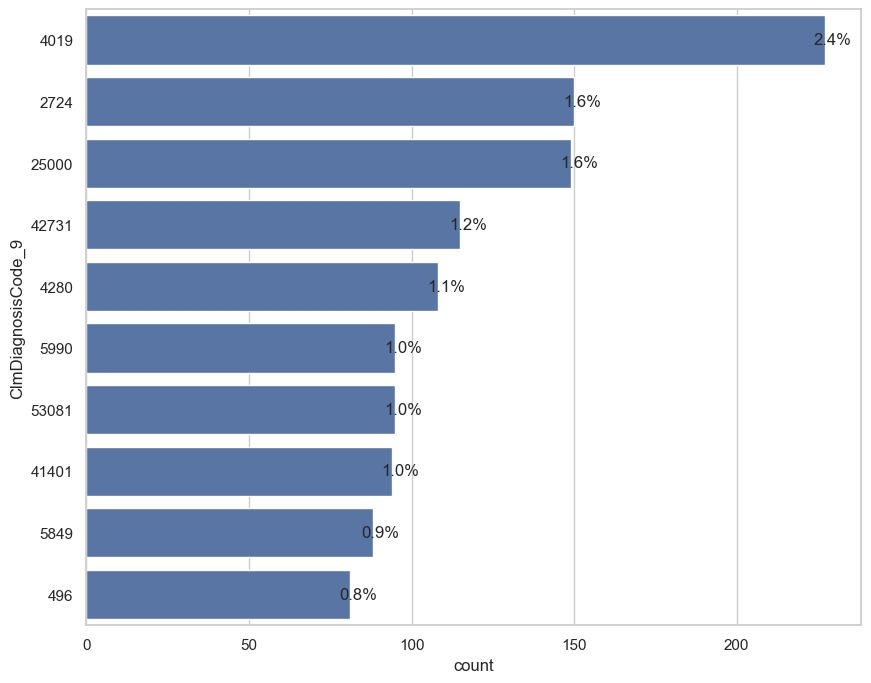

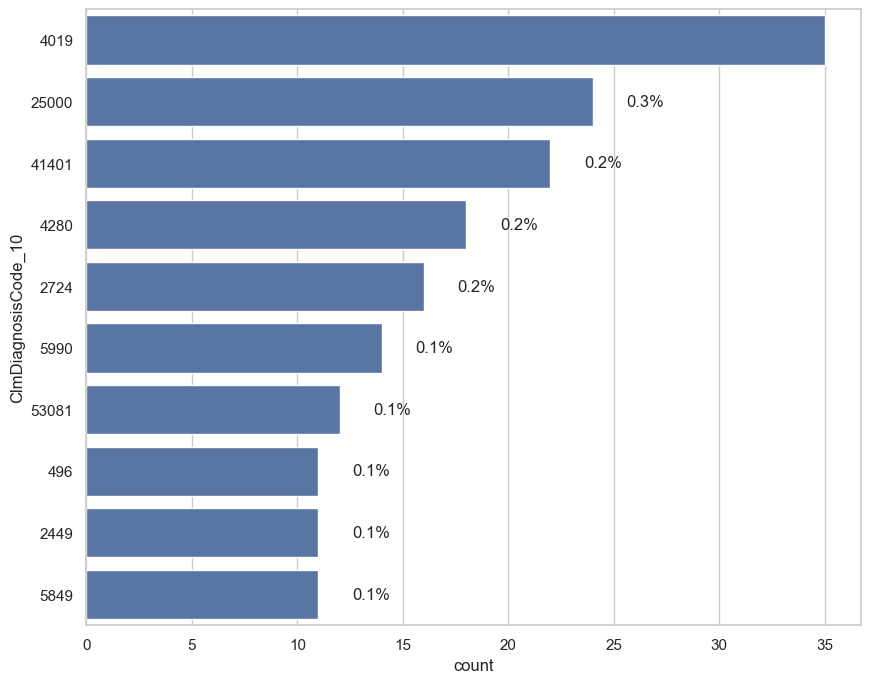

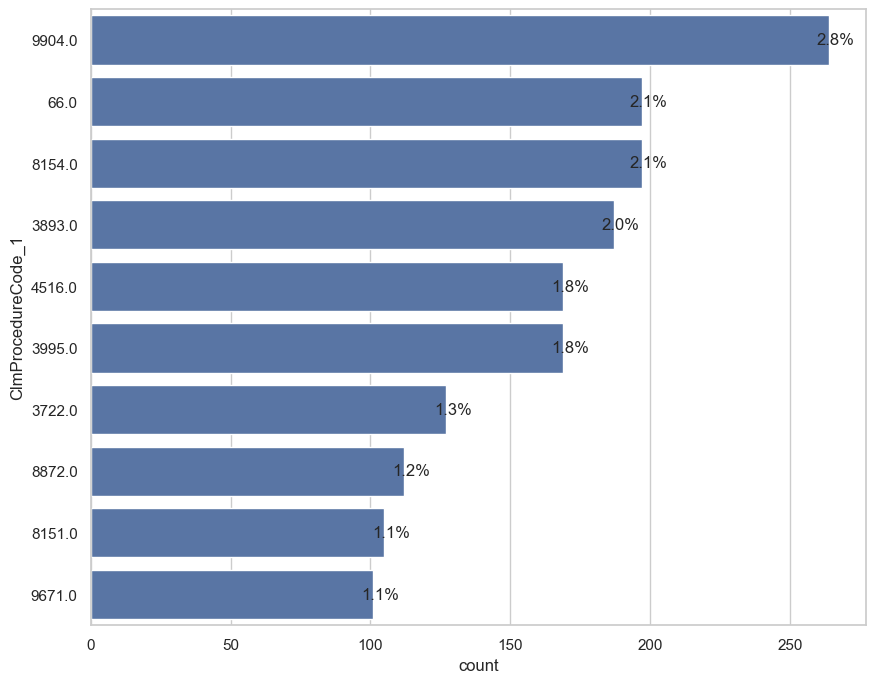

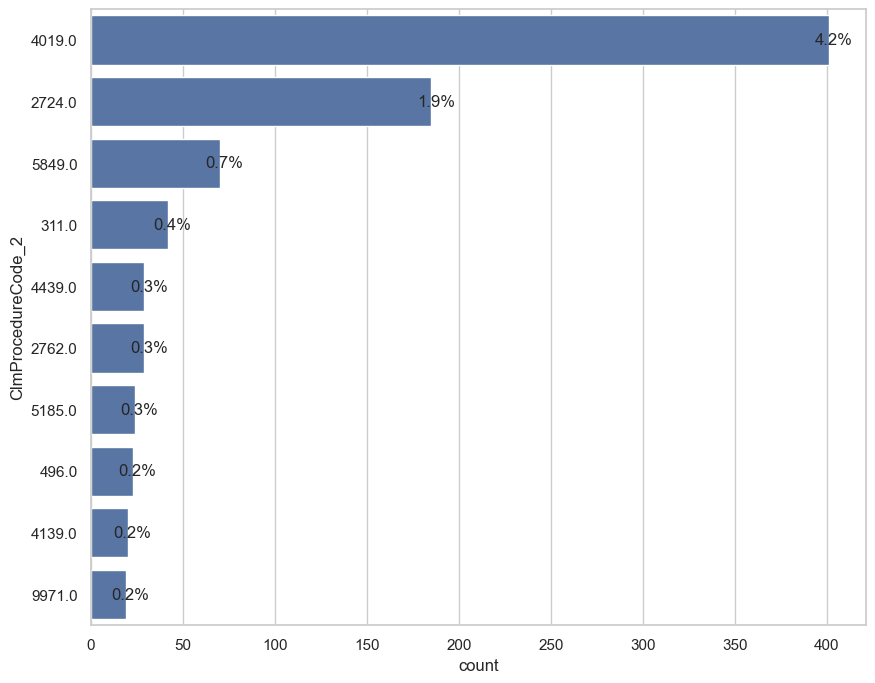

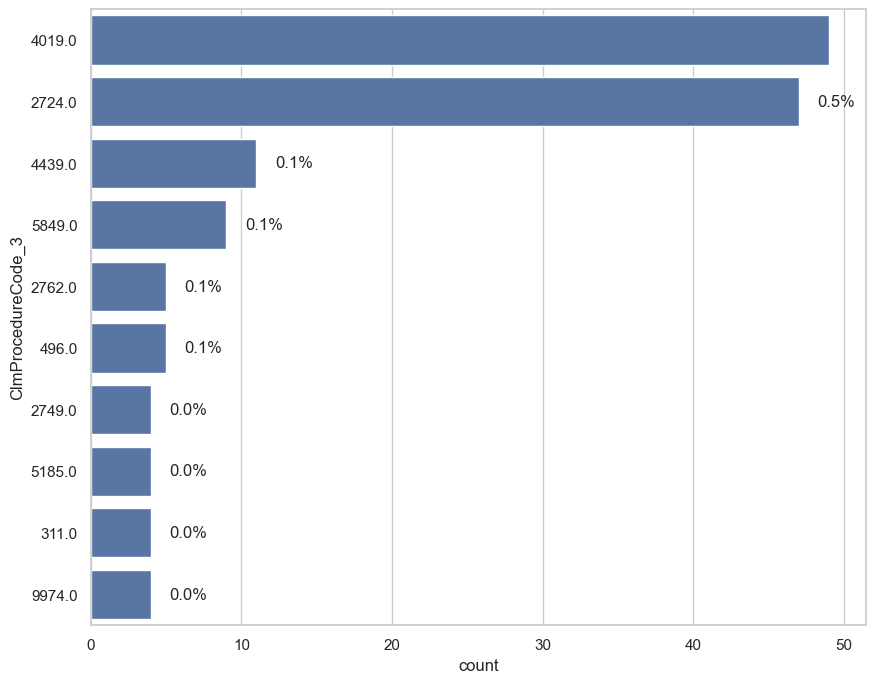

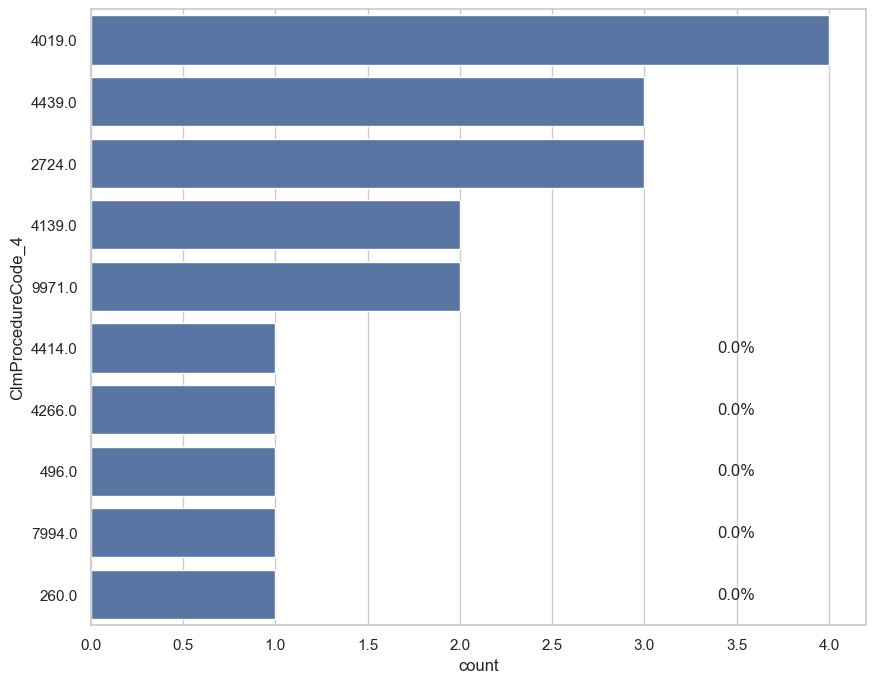

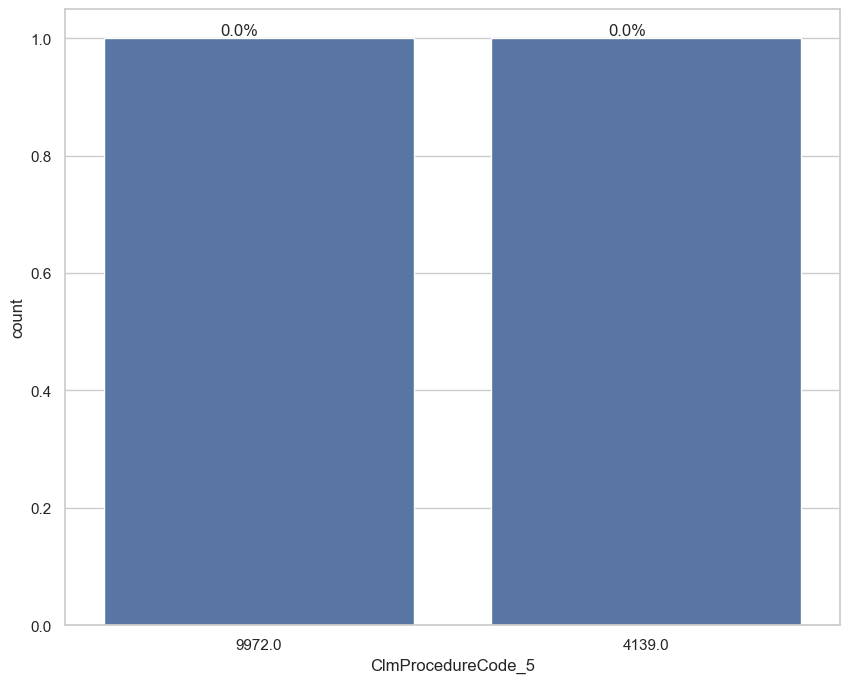

In [188]:
cat_columns_univariate_top_10(df_inp_conv)

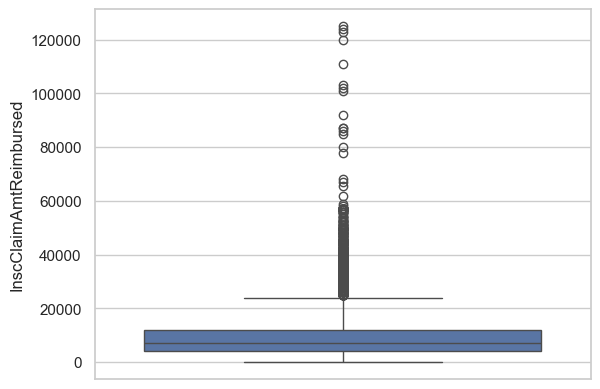

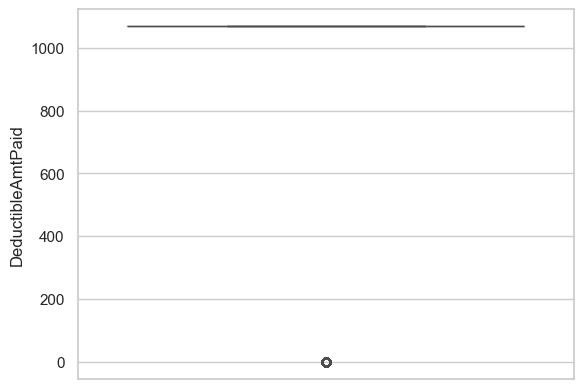

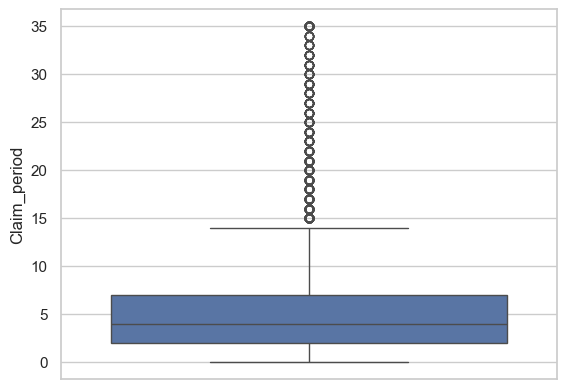

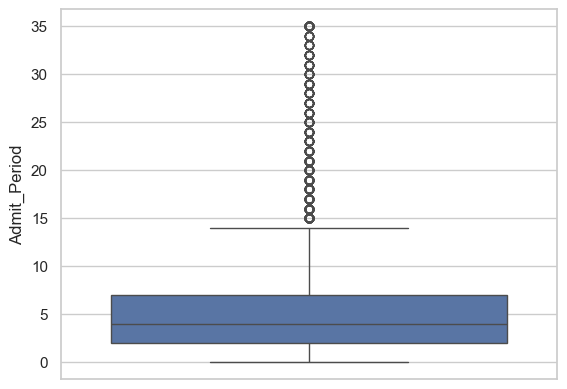

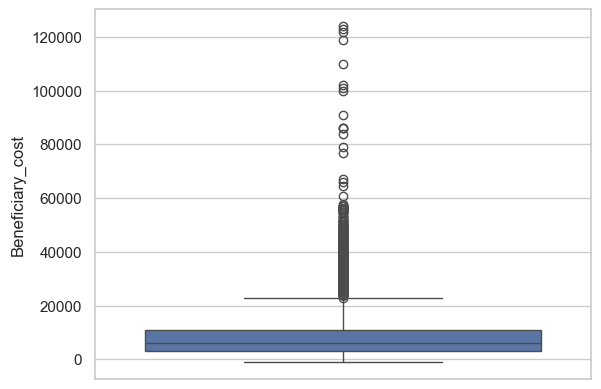

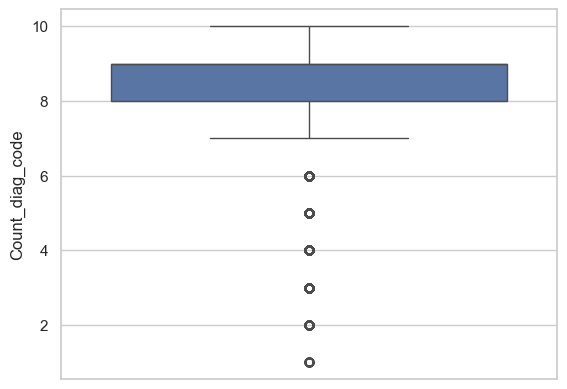

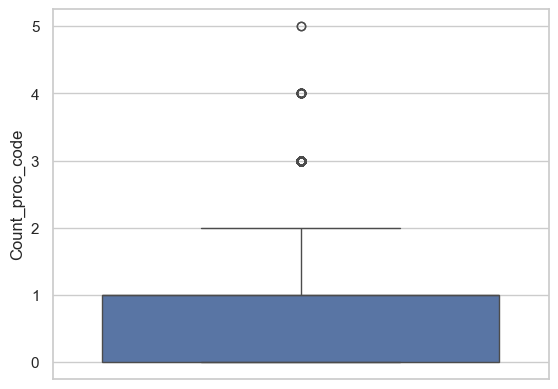

In [193]:
outlier_analysis(df_inp_conv)

**Out patient**

In [194]:
df_outp.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [33]:
df_outp.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BeneID,125841,59608,BENE103720,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimID,125841,125841,CLM357675,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimStartDt,125841,385,2009-04-04,416,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimEndDt,125841,365,2009-03-29,419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provider,125841,1259,PRV56573,3065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InscClaimAmtReimbursed,125841.0,NaN,NaN,NaN,288.820496,751.028751,0.0,40.0,80.0,200.0,93240.0
AttendingPhysician,125525,19584,PHY378872,939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingPhysician,21604,7360,PHY388995,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherPhysician,47619,11578,PHY344080,1205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClmDiagnosisCode_1,123263,8268,4019,3248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_outp.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [51]:
df_outp_conv=type_conv(df_outp,config_data,"datetime_columns_outp","obj_columns_outp","int_columns_outp")

In [52]:
df_outp.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
ClmProcedureCode_1                object
ClmProcedureCode_2                object
ClmProcedureCode_3                object
ClmProcedureCode_4                object
ClmProcedureCode_5                object
ClmProcedureCode

In [63]:
len(df_outp)

125841

In [54]:
df_outp.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1             0
ClmProcedureCode_2             0
ClmProcedureCode_3             0
ClmProcedureCode_4             0
ClmProcedureCode_5             0
ClmProcedureCode_6             0
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [55]:
cat_cols=col_separation(df_outp_conv)[0]
int_cols=col_separation(df_outp_conv)[1]
tim_cols=col_separation(df_outp_conv)[2]

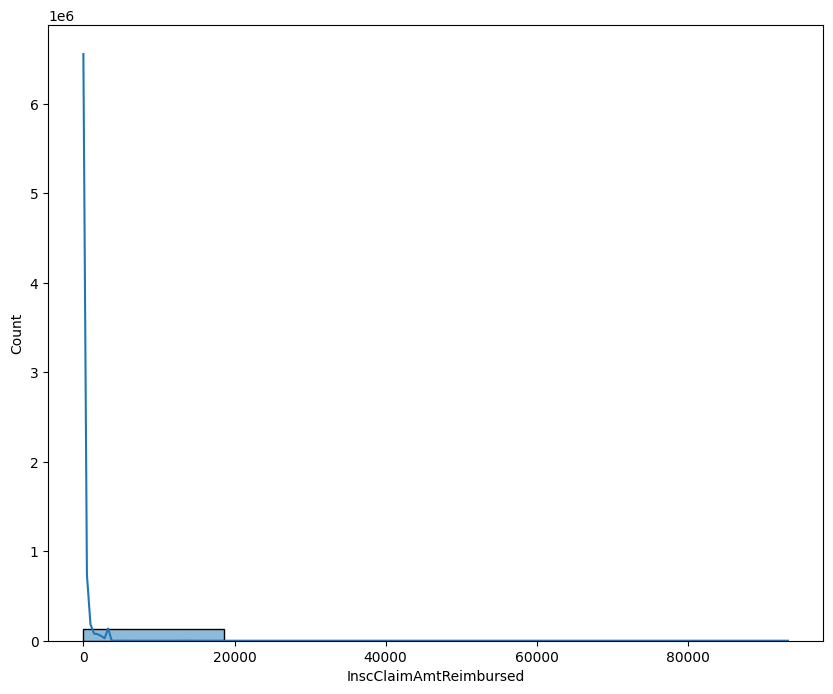

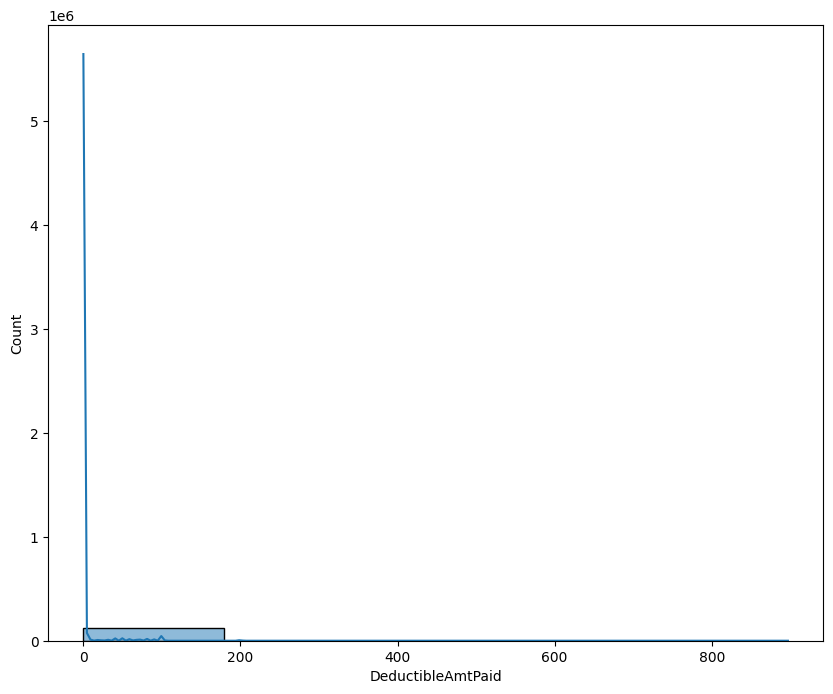

In [60]:
num_univariate(df_outp_conv)

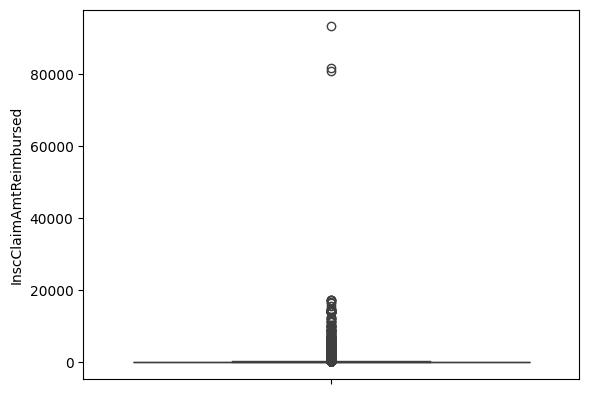

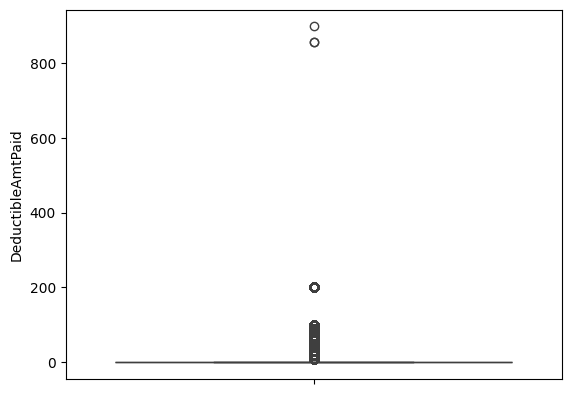

In [61]:
outlier_analysis(df_outp_conv)

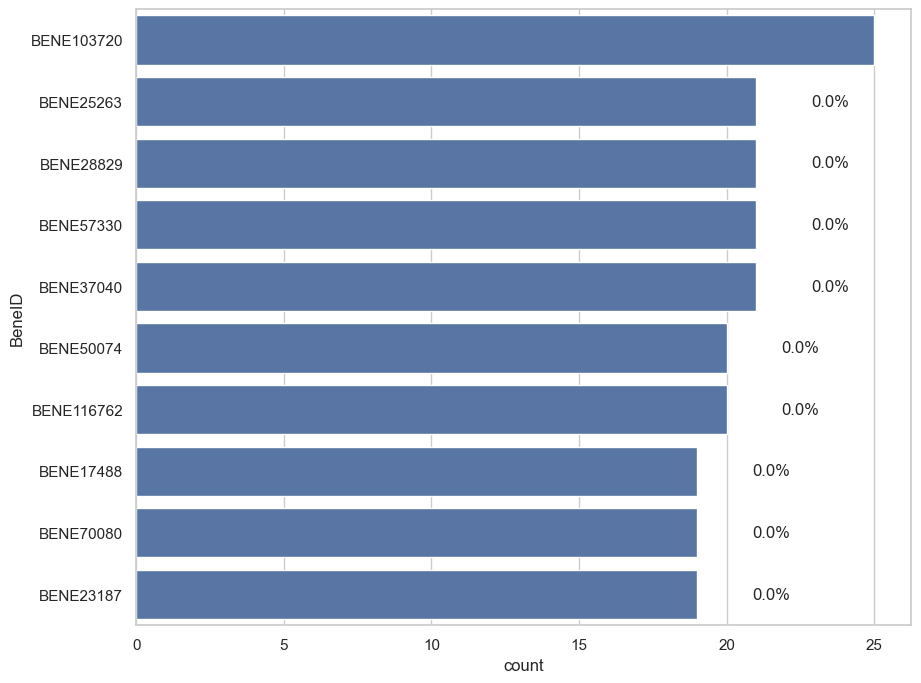

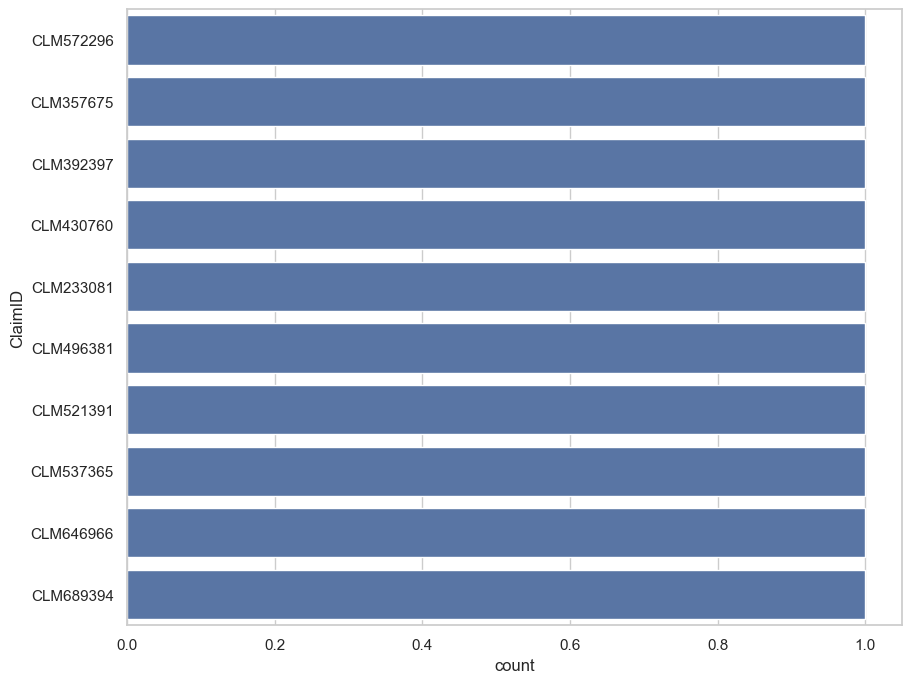

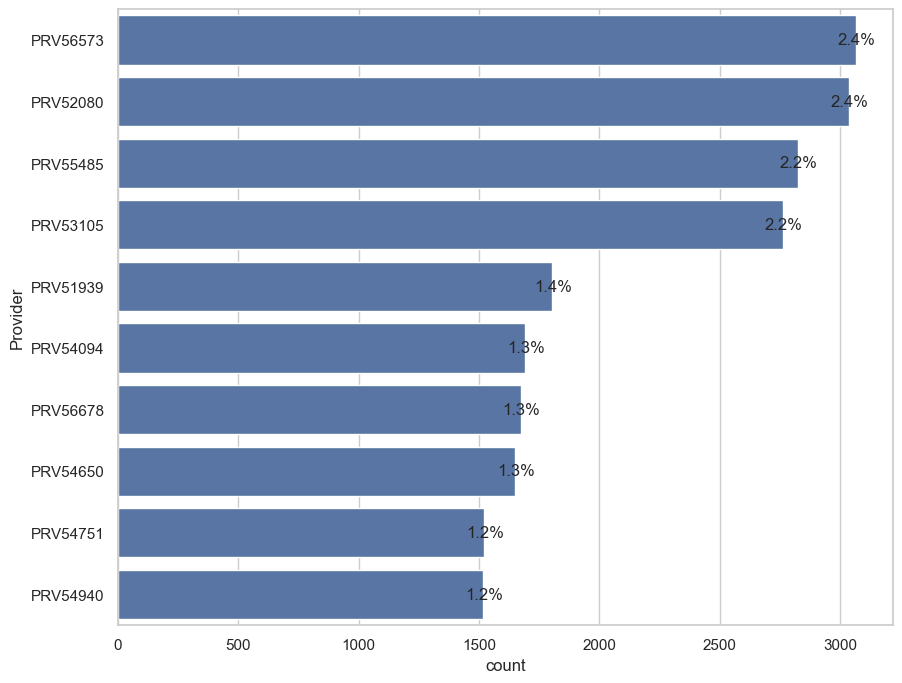

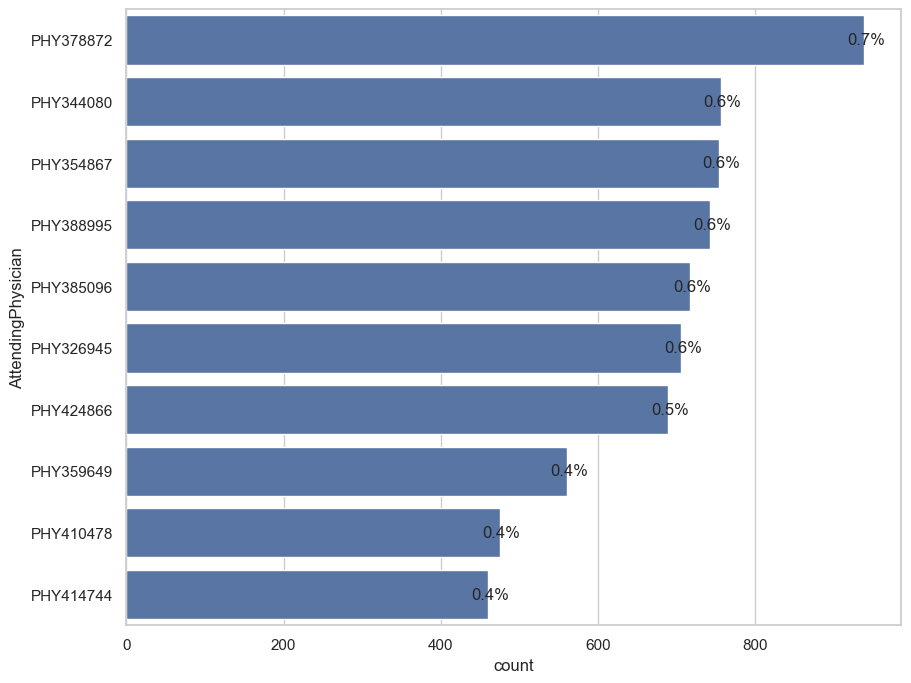

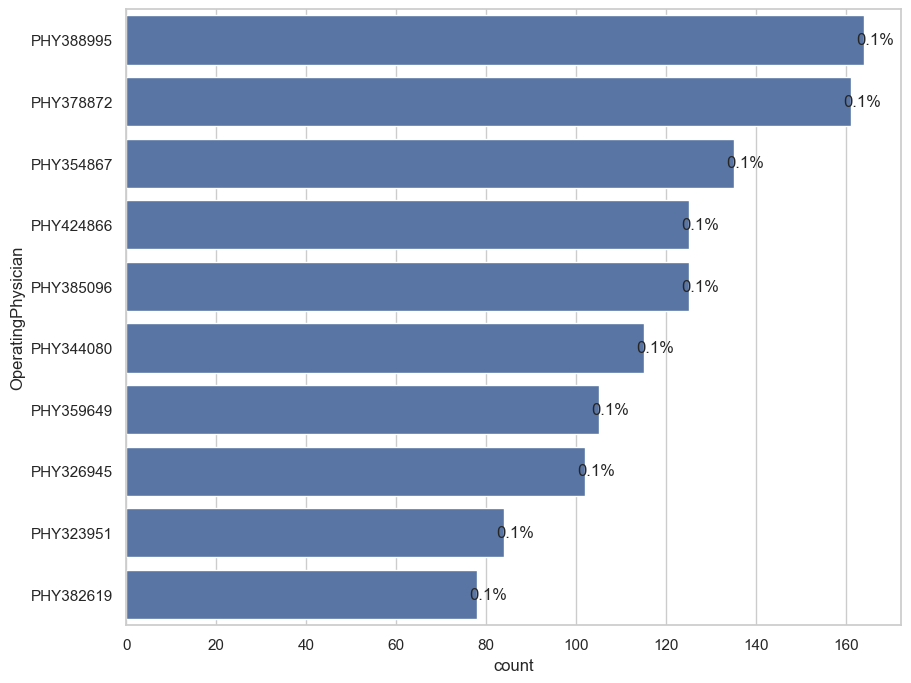

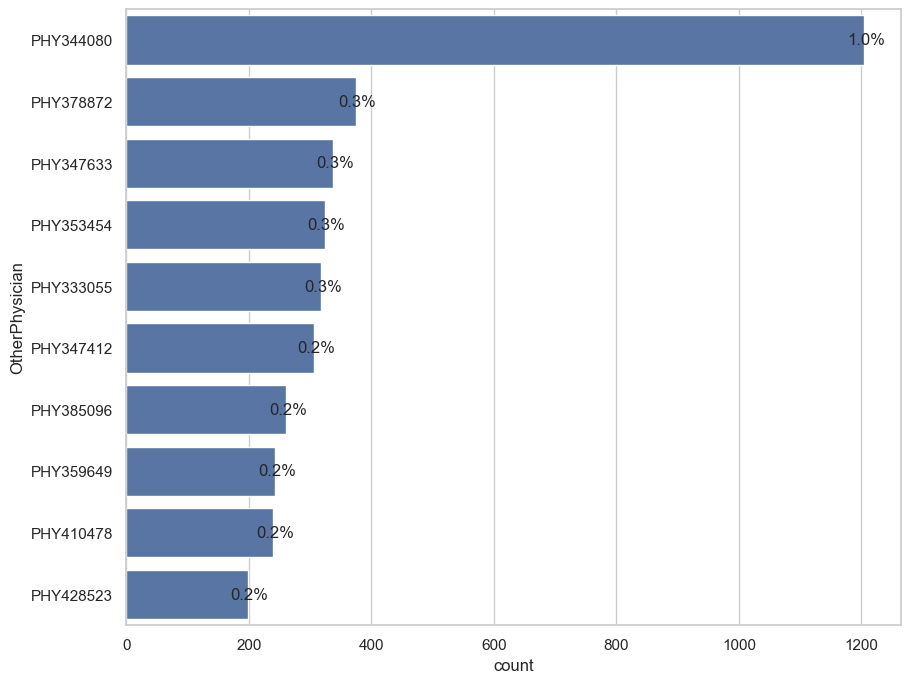

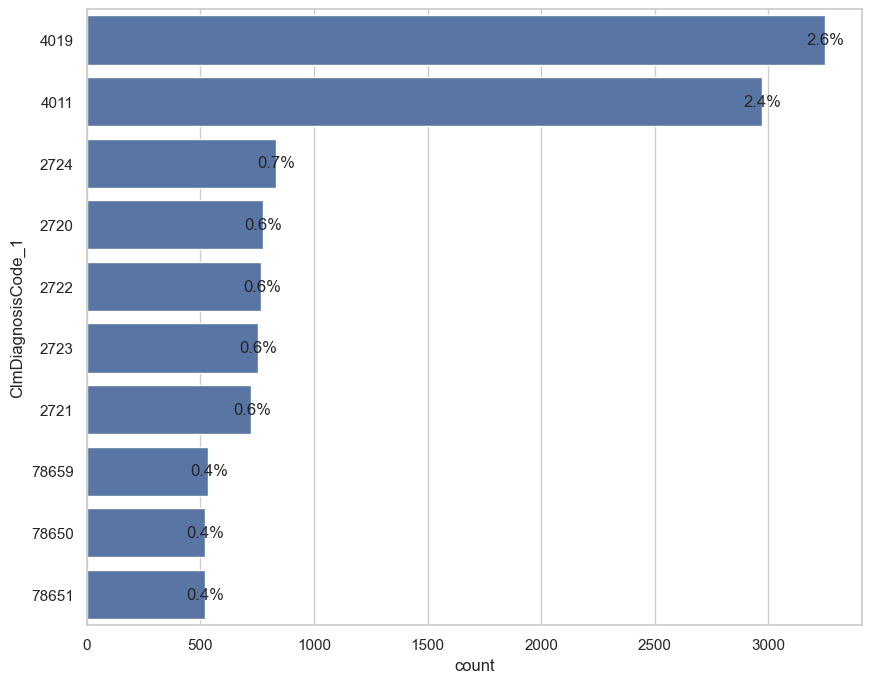

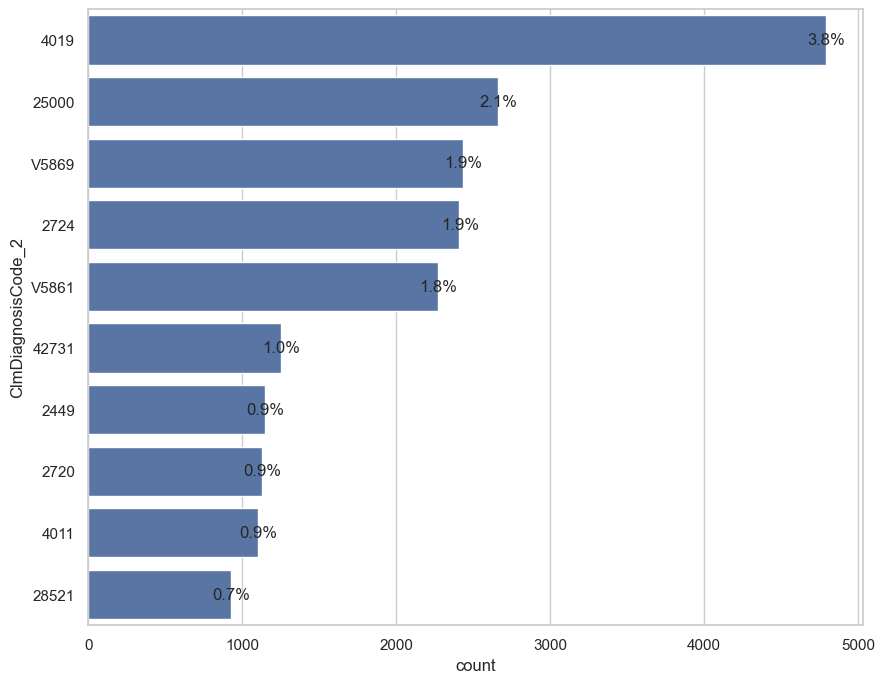

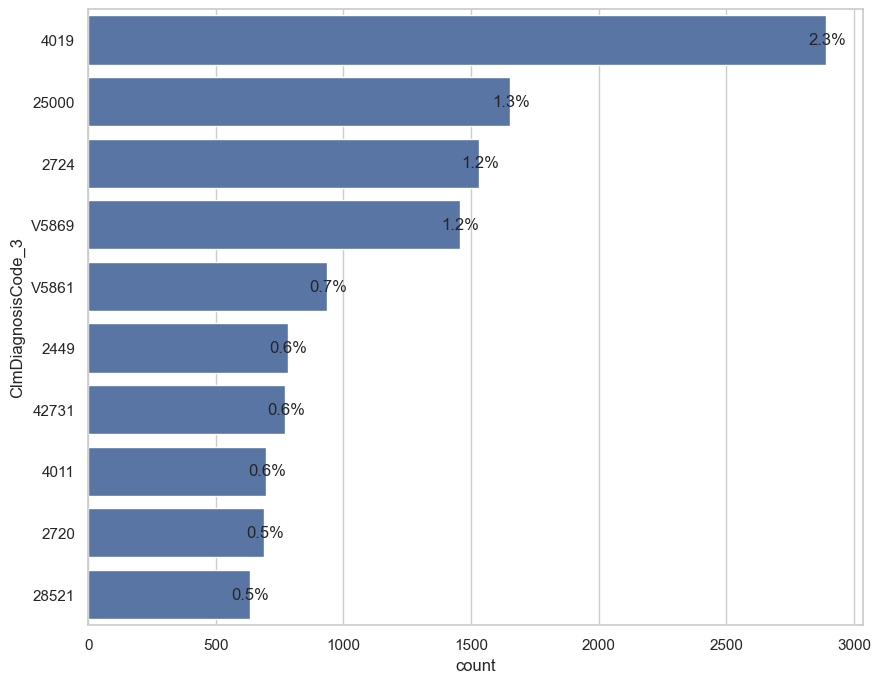

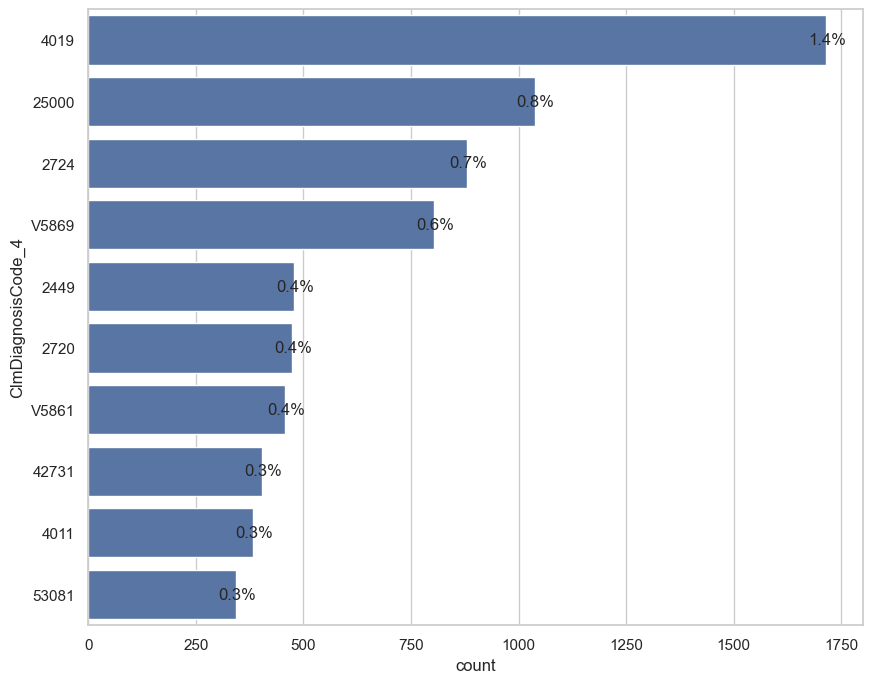

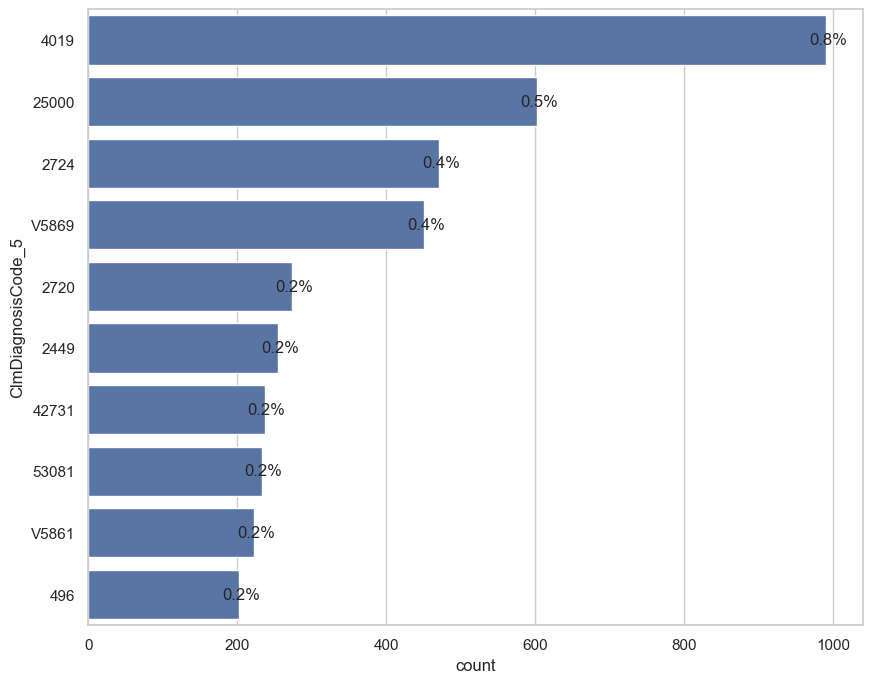

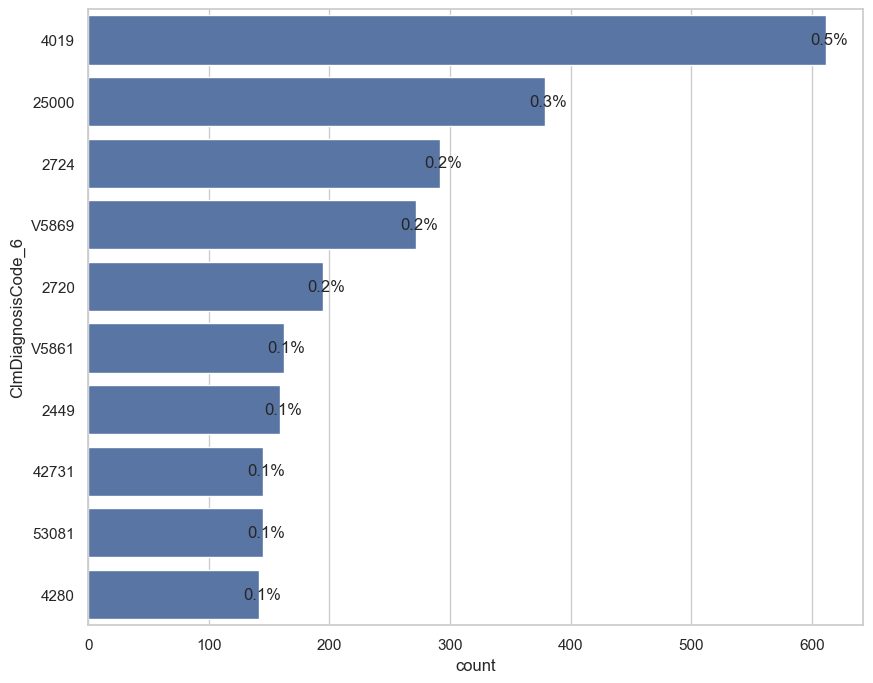

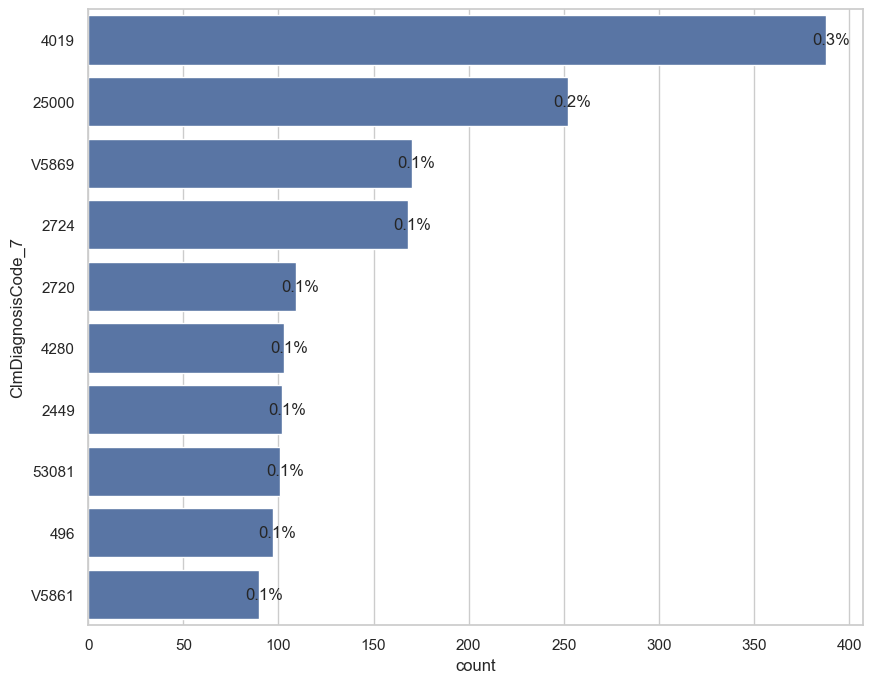

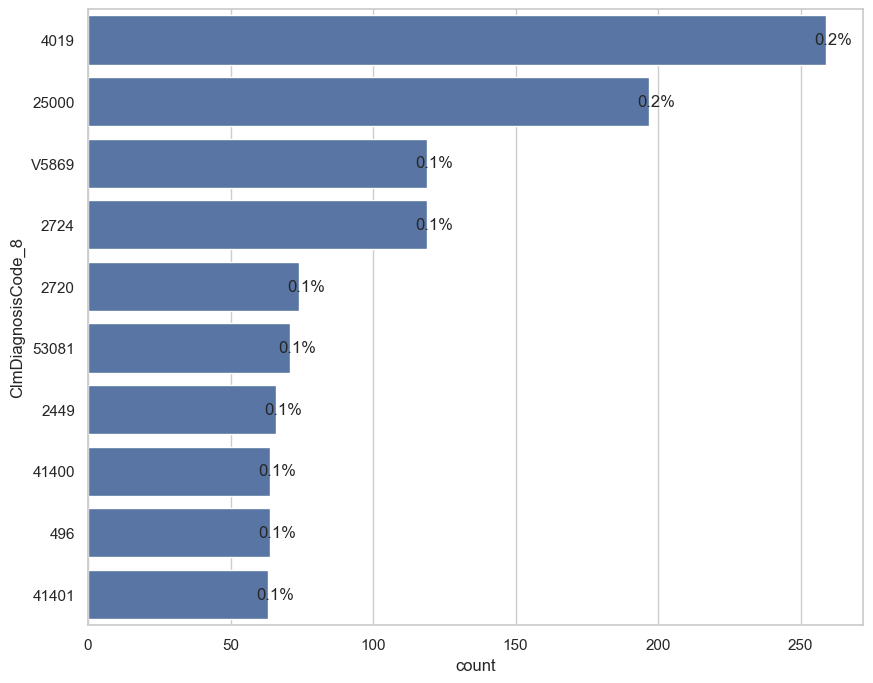

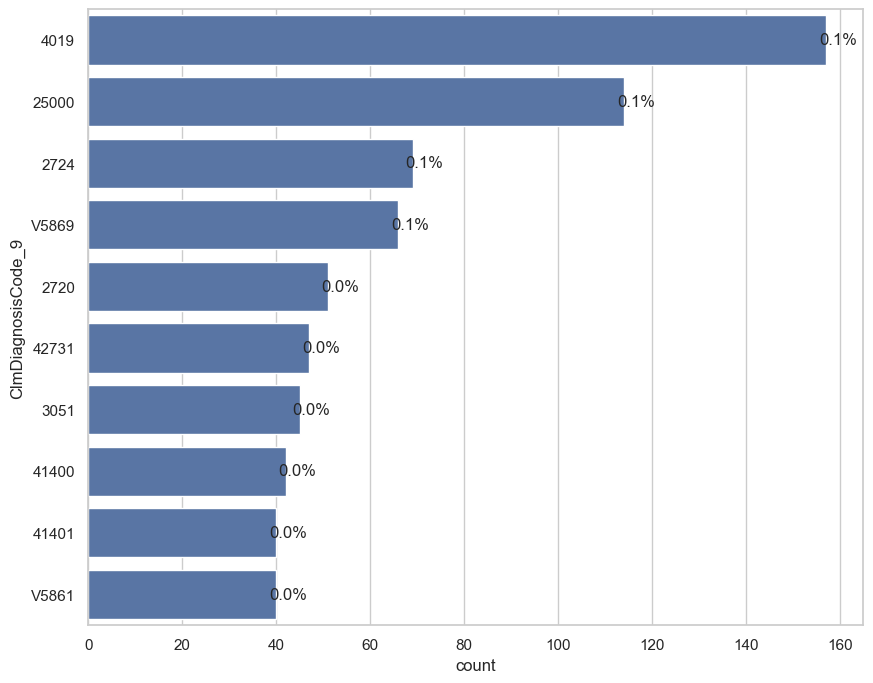

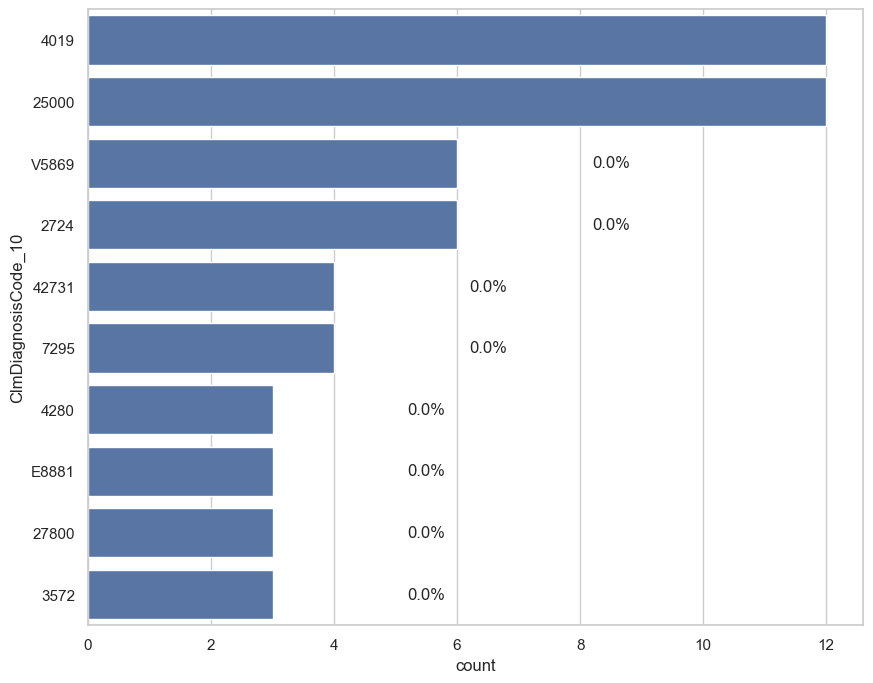

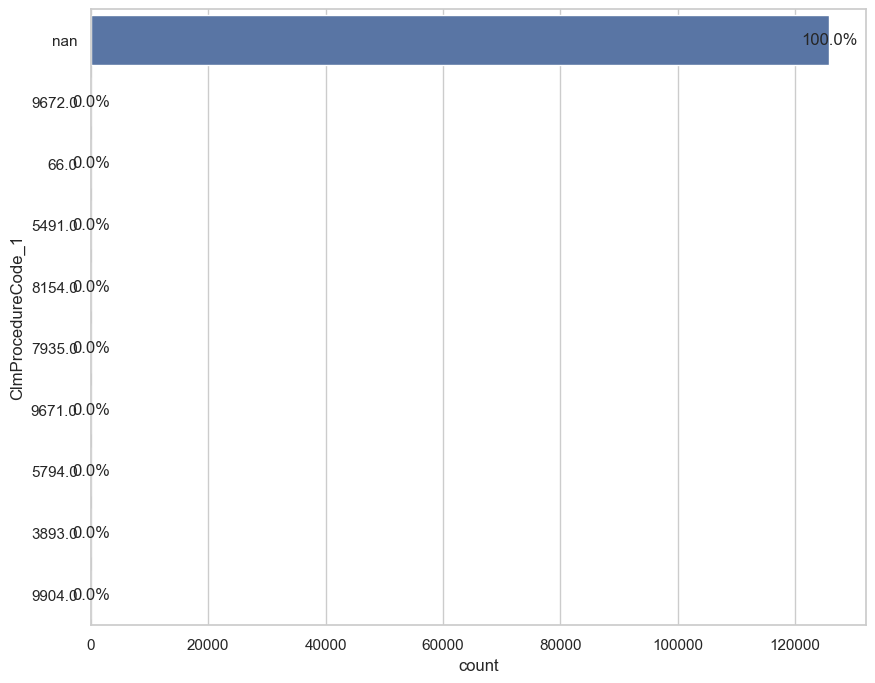

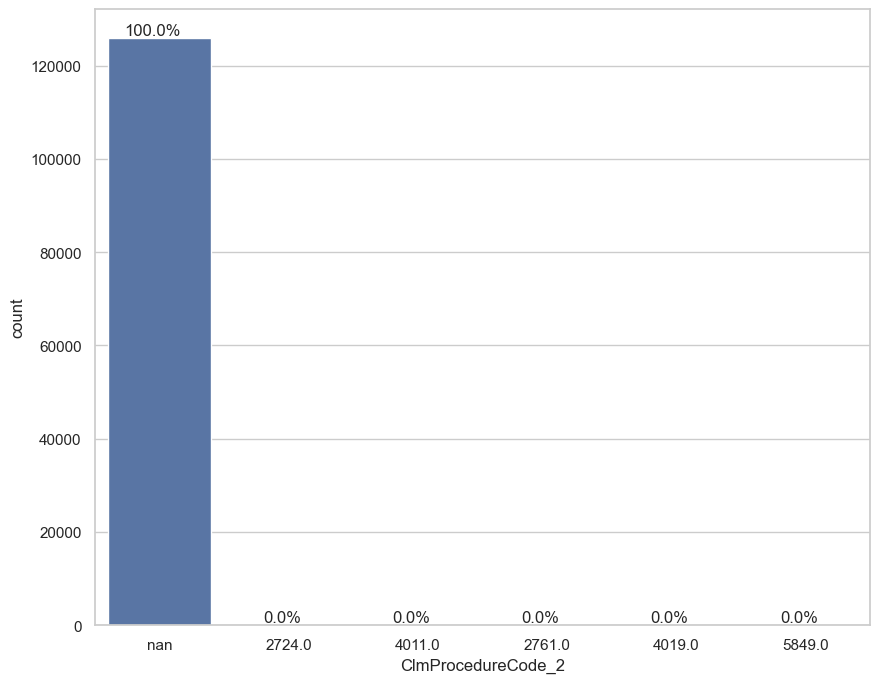

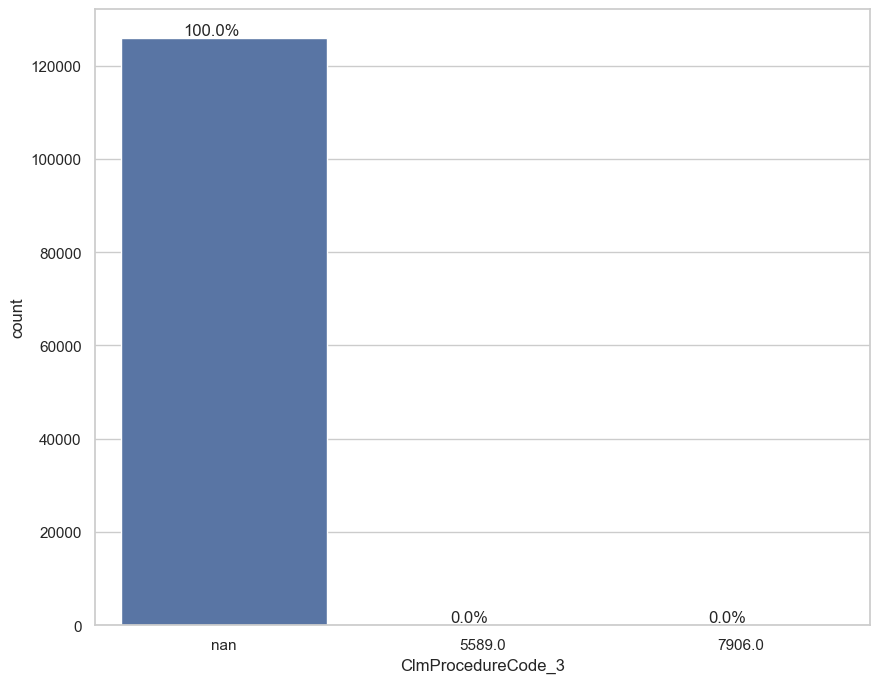

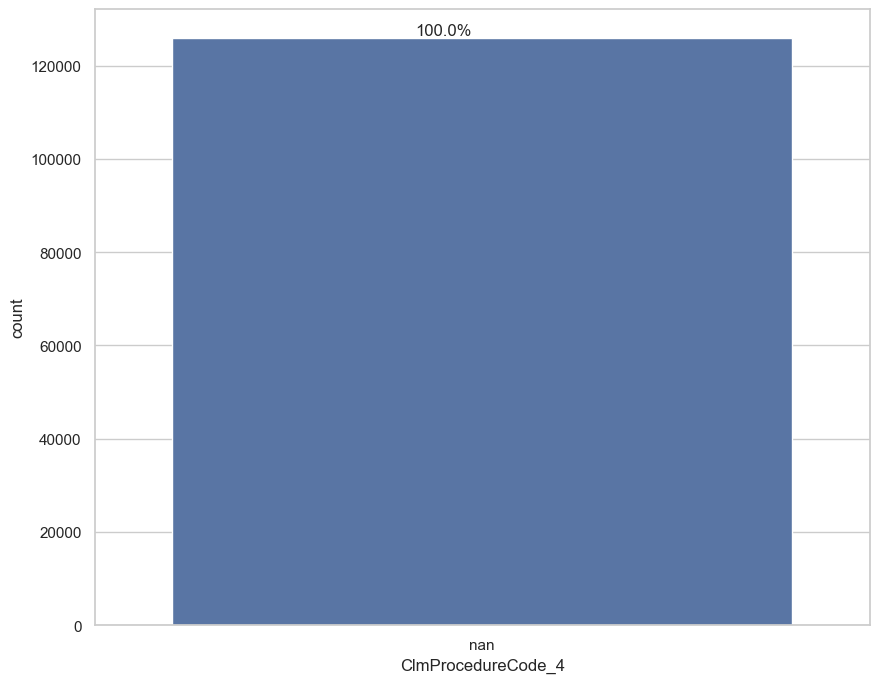

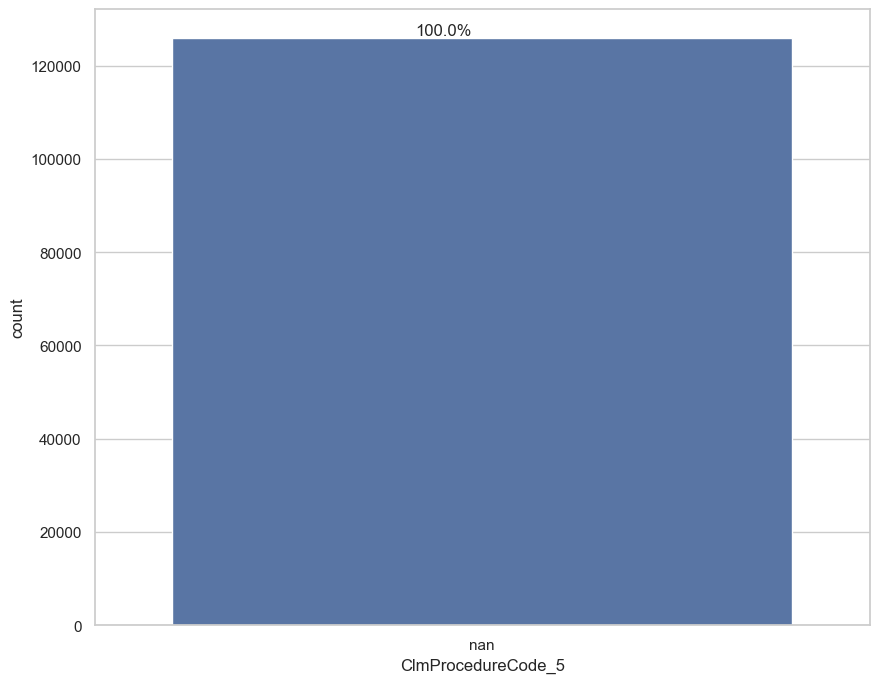

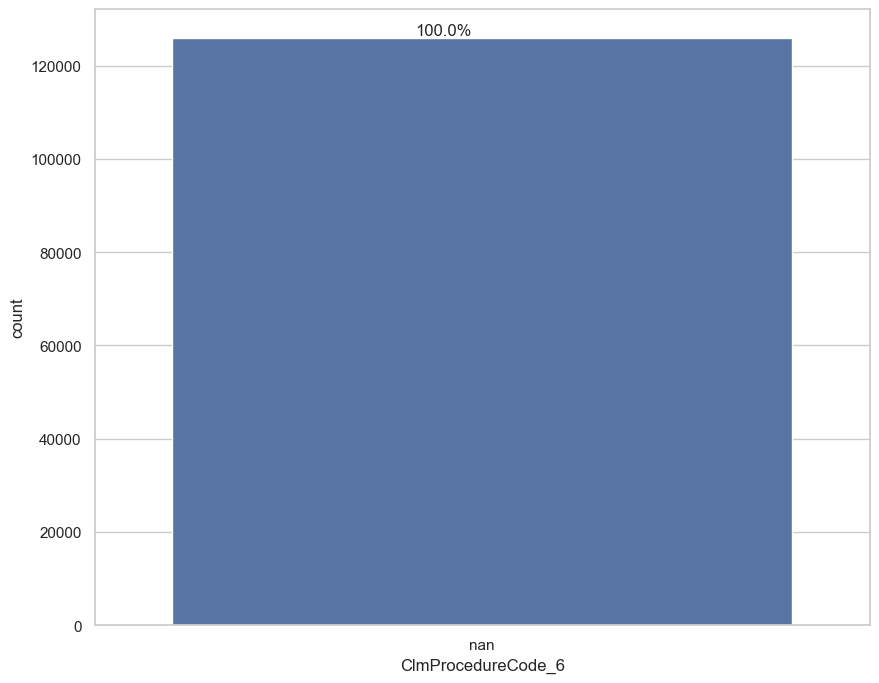

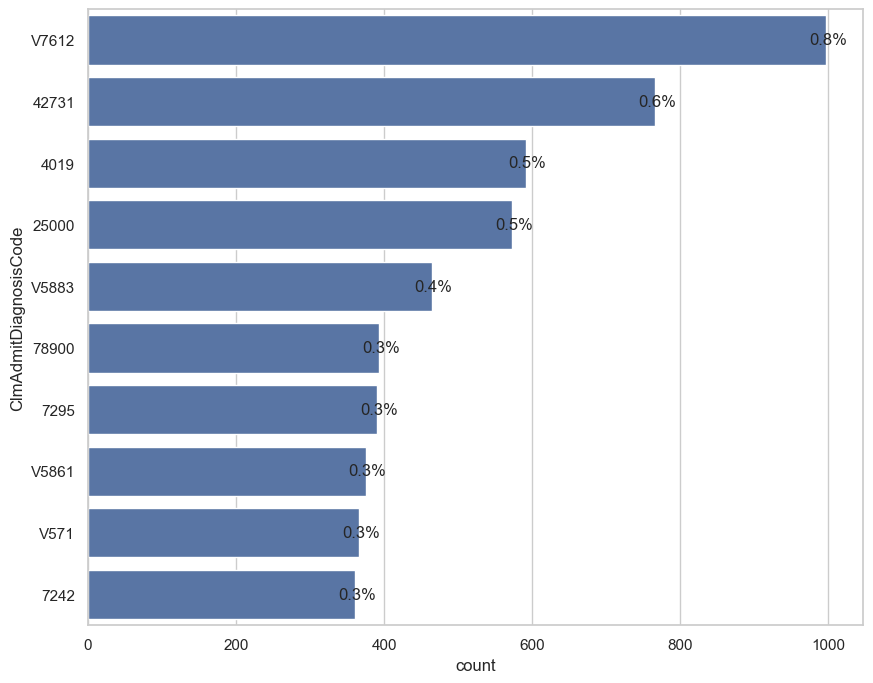

In [62]:
cat_columns_univariate_top_10(df_outp_conv)